<H1> Heart Disease Prediction ( Problem statement 4_Logistic Regression_framingham) </H1>



<H2>Data Loading</H2>


In [29]:
#Importing libraries needed and set configuration to show max rows & columns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#Load attrition dataset into dataframe
heartdisease_df = pd.read_csv("framingham.csv") 
heartdisease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
<h2> Data Visualization and Exploration </h2>

In [30]:
# Explore on the data & print the information
print("Total number of dataset", heartdisease_df.shape[0])
print("Total number of features", heartdisease_df.shape[1])
print("Heart Disease Dataset Information")
heartdisease_df.info()
heartdisease_df.dtypes
# Check for null entries 
print(heartdisease_df.isnull().sum())

heartdisease_df.describe()

heartdisease_df = heartdisease_df.dropna()
print(heartdisease_df.isnull().sum())
print("Total number of dataset", heartdisease_df.shape[0])
print("Total number of features", heartdisease_df.shape[1])
print(heartdisease_df)

Total number of dataset 4238
Total number of features 16
Heart Disease Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD     

0    3099
1     557
Name: TenYearCHD, dtype: int64


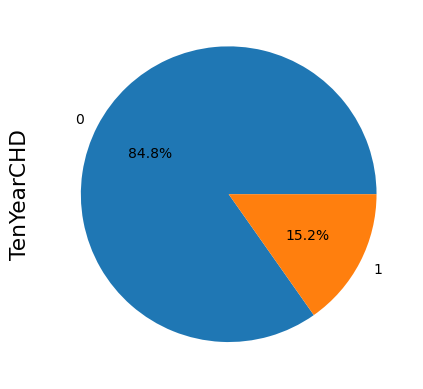

In [31]:
#Checking data distribution for heart disease - target variable
heartdisease_df['TenYearCHD'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=10)
print(heartdisease_df['TenYearCHD'].value_counts())


<h3>Observation : Looking at the target variable distribution it seems  data is not balanced ( 15% - Yes, 85%- No)</h3>

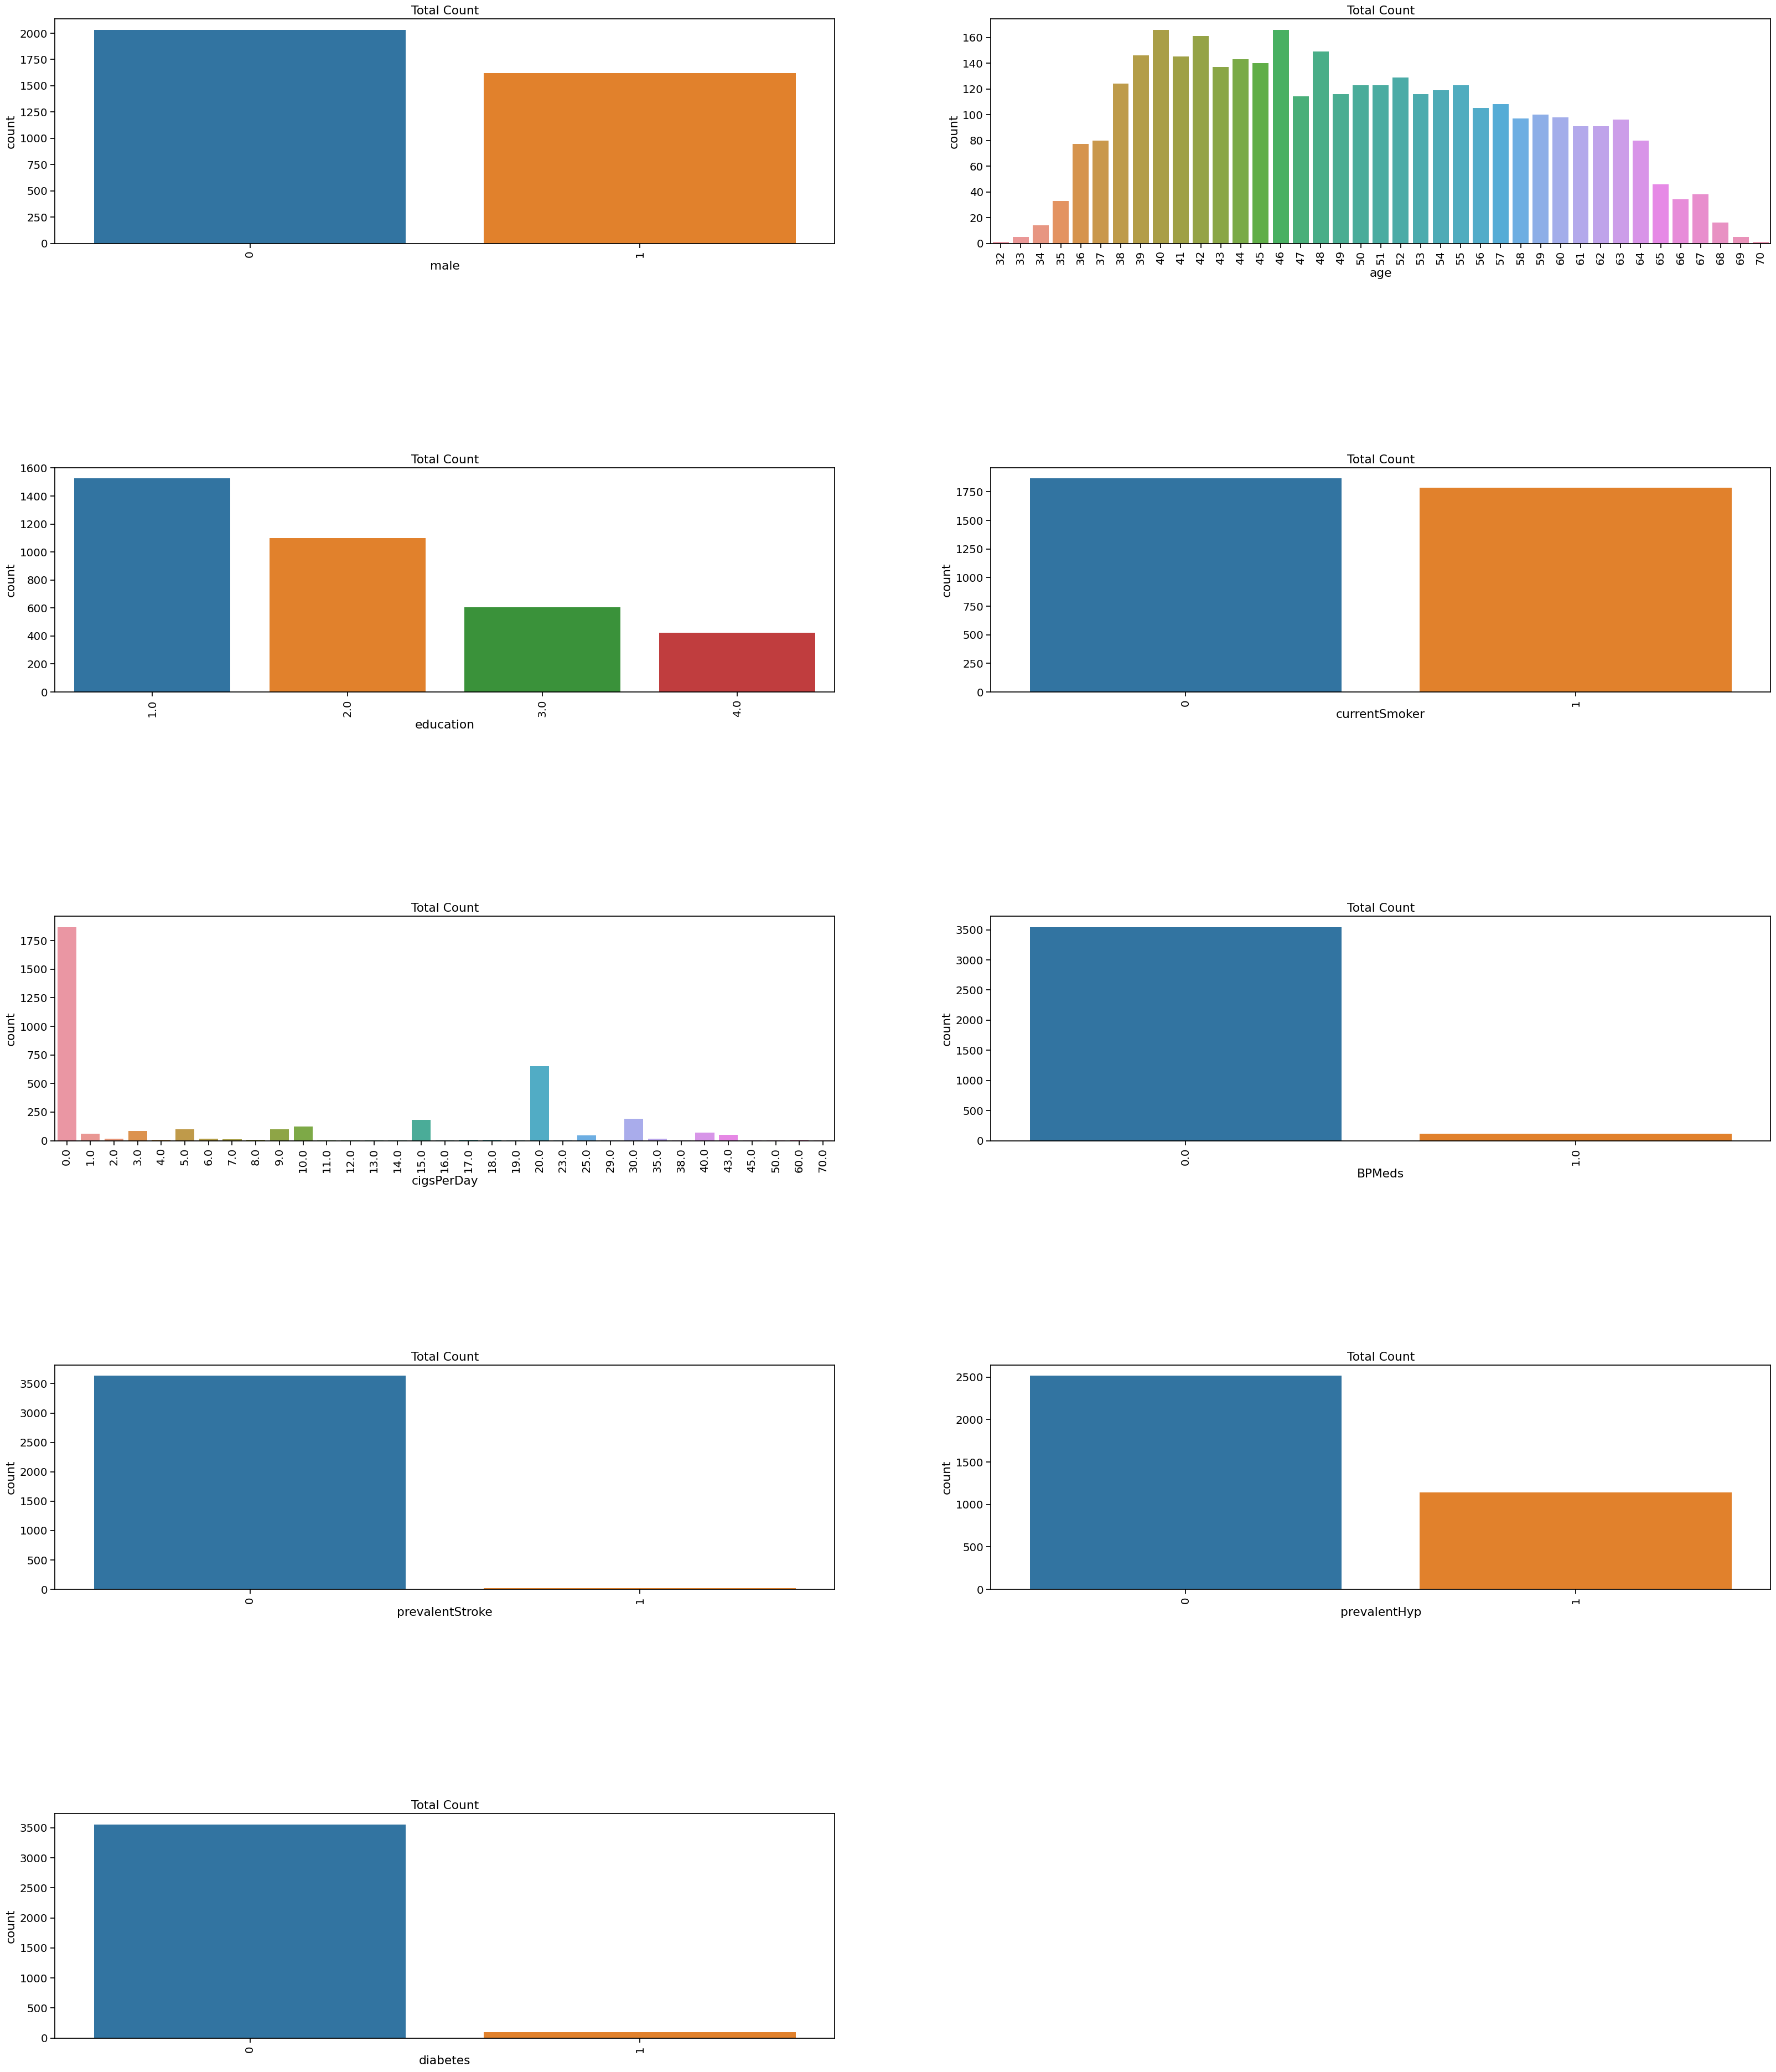

In [32]:
# Let's look at distribution of data for numerical values
import seaborn as sns
features=['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp', 'diabetes']
heartdisease_figure=plt.subplots(figsize=(40,100))
for i, j in enumerate(features):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = heartdisease_df)
    plt.xticks(rotation=90)
    plt.title("Total Count")

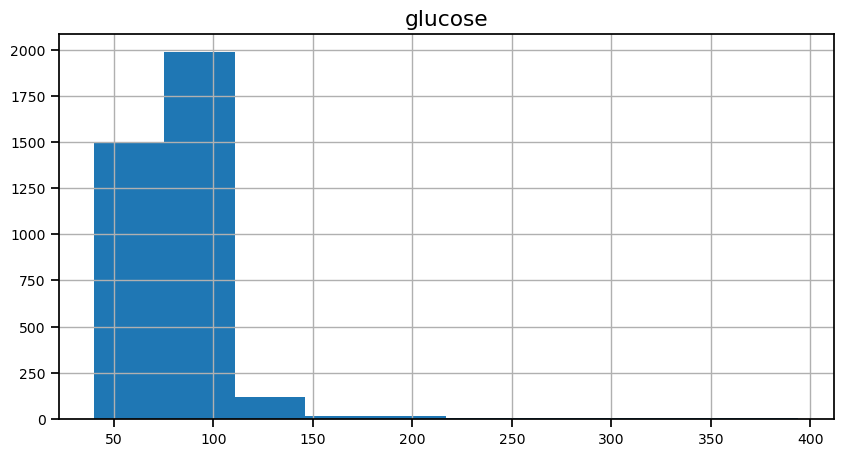

In [33]:
#Plot the distribution of the continuous data - Glucose 

ax= heartdisease_df['glucose'].hist(bins=10,figsize=(10,5))
plt.title("glucose")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


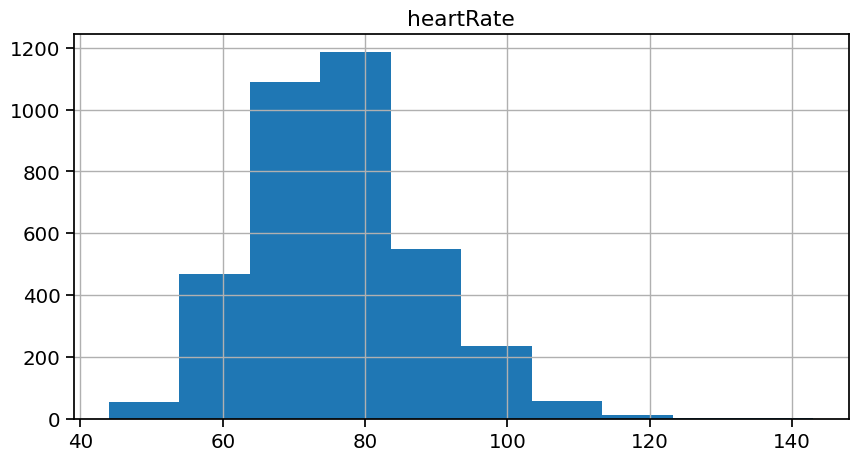

In [34]:
#Plot the distribution of the continuous data - Heart Rate 

heartdisease_df['heartRate'].hist(bins=10,figsize=(10,5))
plt.title("heartRate")
plt.show()


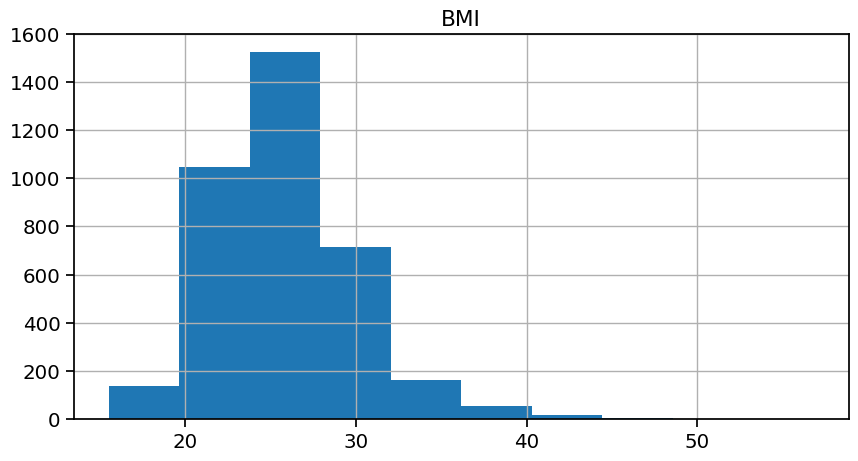

In [35]:
#Plot the distribution of the continuous data - BMI

heartdisease_df['BMI'].hist(bins=10,figsize=(10,5))
plt.title("BMI")
plt.show()

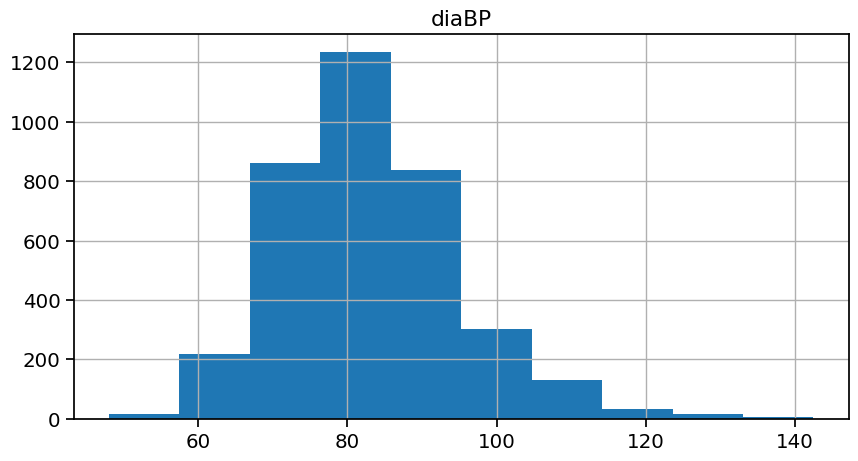

In [36]:
#Plot the distribution of the continuous data - DiaBP

heartdisease_df['diaBP'].hist(bins=10,figsize=(10,5))
plt.title("diaBP")
plt.show()

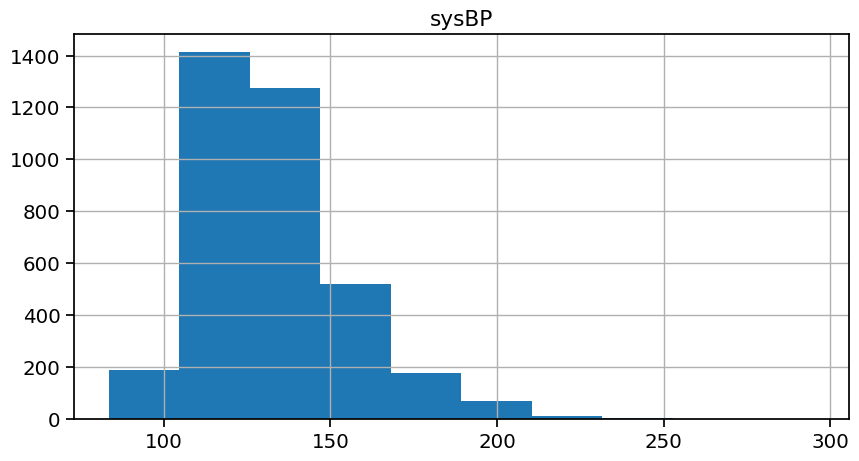

In [38]:
#Plot the distribution of the continuous data - sysBP

heartdisease_df['sysBP'].hist(bins=10,figsize=(10,5))
plt.title("sysBP")
plt.show()

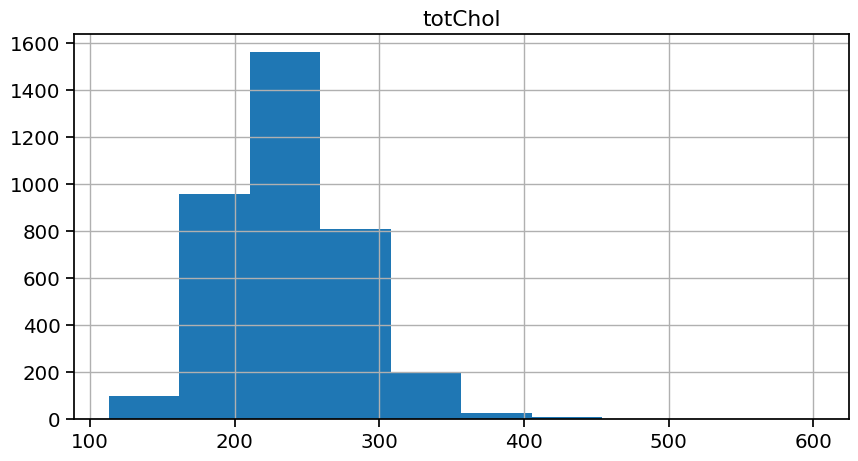

In [40]:
#Plot the distribution of the continuous data - totChol

heartdisease_df['totChol'].hist(bins=10,figsize=(10,5))
plt.title("totChol")
plt.show()

In [41]:
#Define function for crosstab plot
def crosstabplot(heartdisease_df,feature,target):
    barplot = pd.crosstab(heartdisease_df[feature],heartdisease_df[target]).plot(kind="bar",figsize=(10,6))
    plt.title(feature+ " vs "+target)
    plt.xlabel(feature)
    plt.ylabel("No of people who is having heart disease "+target)
    plt.legend(["No","Yes"])
    plt.xticks(rotation=0)
    for p in barplot.patches:
        barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

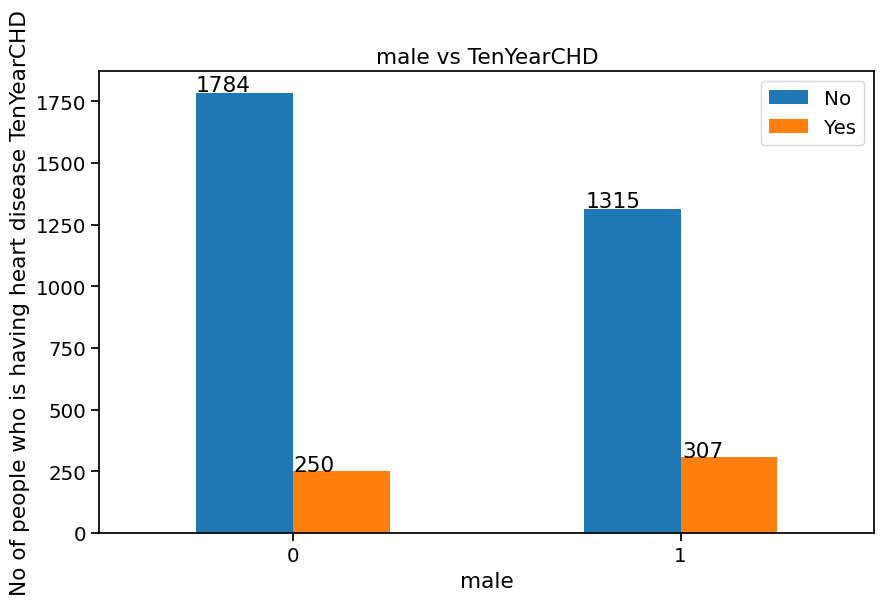

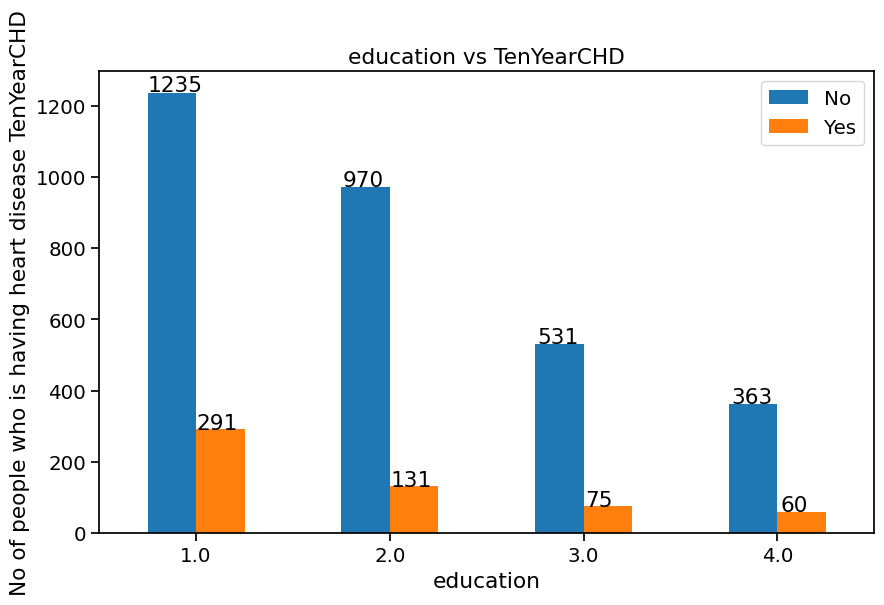

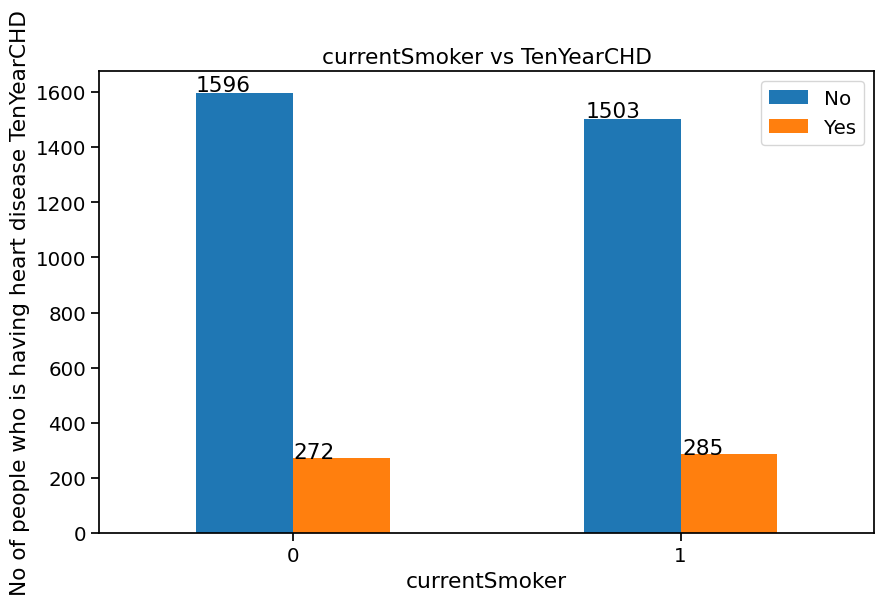

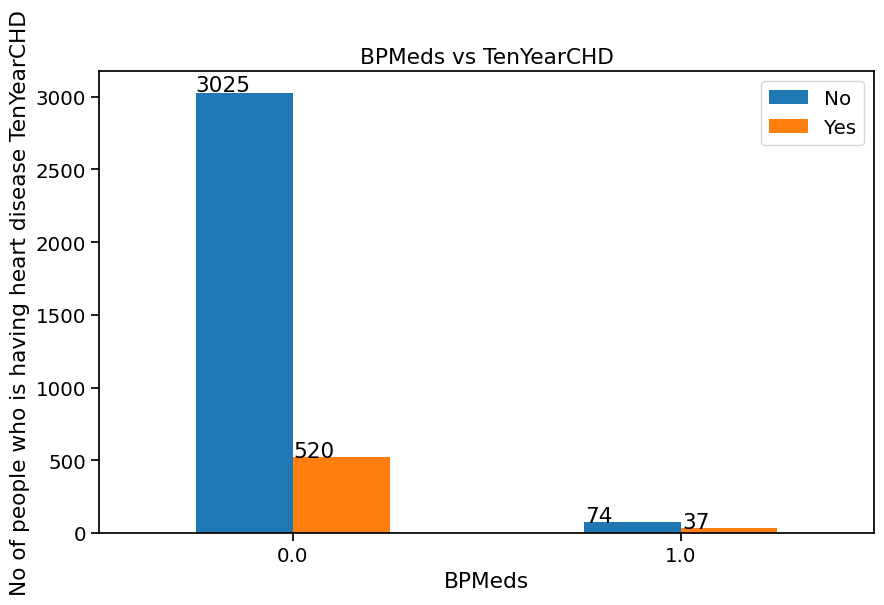

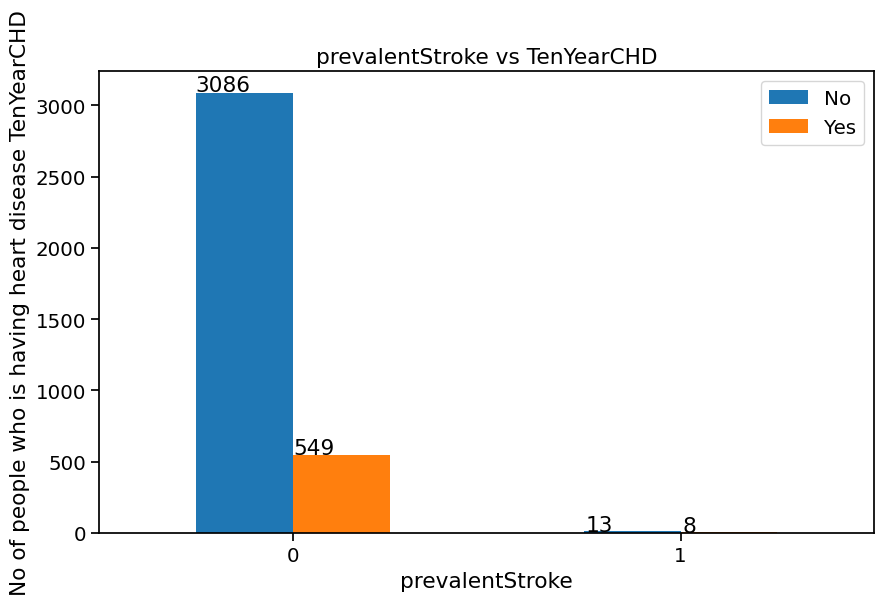

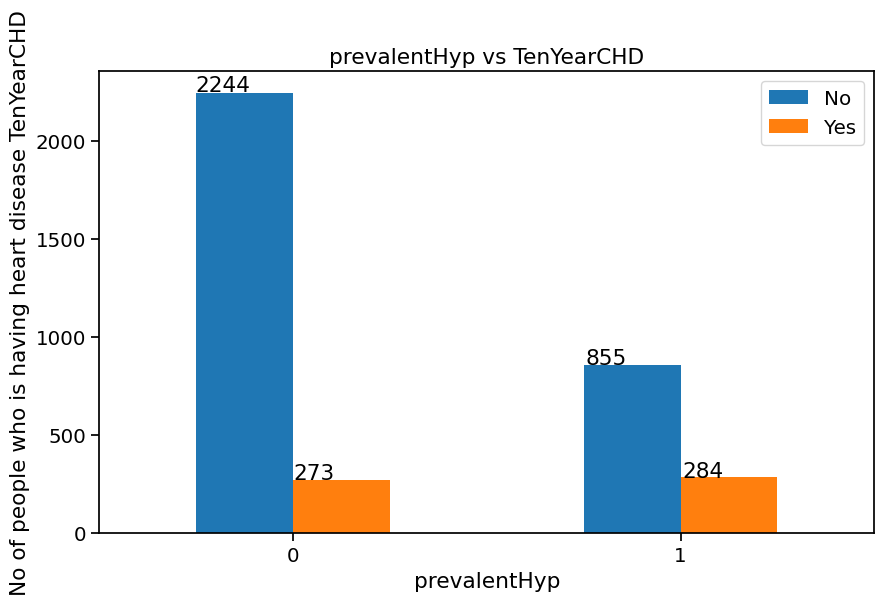

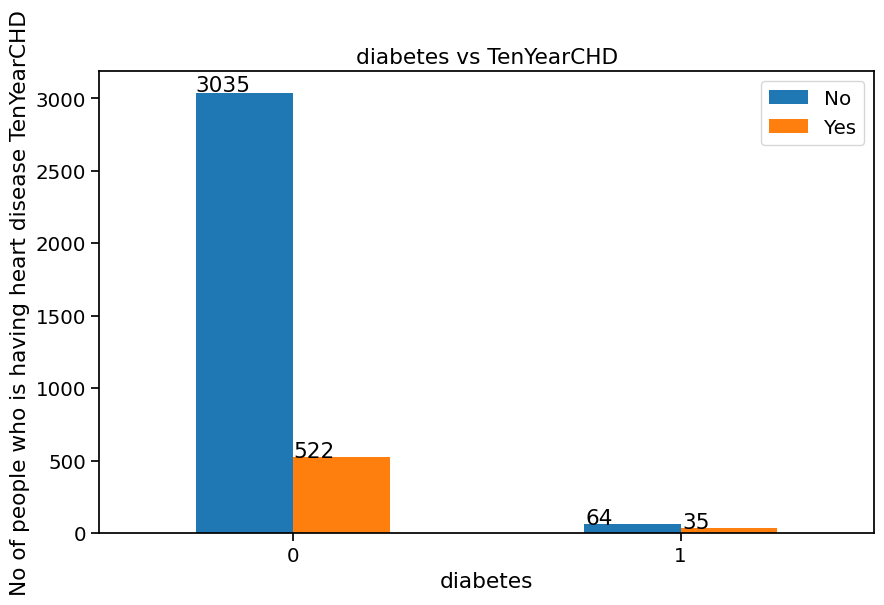

In [42]:
#Plots for Categorical data
crosstabplot(heartdisease_df,'male','TenYearCHD')
crosstabplot(heartdisease_df,'education','TenYearCHD')
crosstabplot(heartdisease_df,'currentSmoker','TenYearCHD')
crosstabplot(heartdisease_df,'BPMeds','TenYearCHD')
crosstabplot(heartdisease_df,'prevalentStroke','TenYearCHD')
crosstabplot(heartdisease_df,'prevalentHyp','TenYearCHD')
crosstabplot(heartdisease_df,'diabetes','TenYearCHD')

1


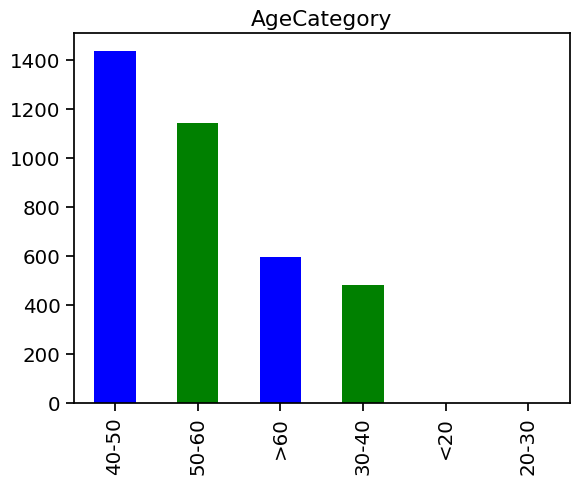

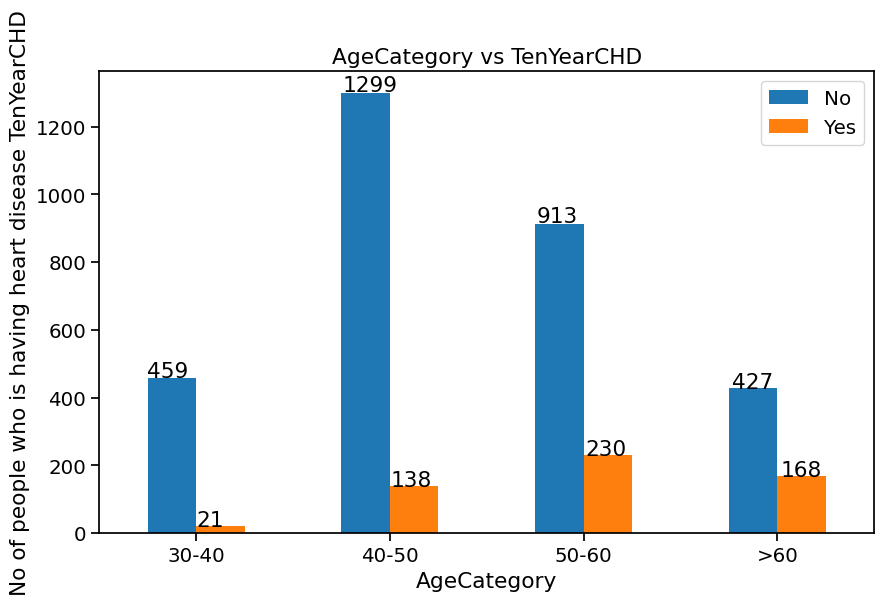

In [43]:
#Grouping age into category using binning method for better analysis on data distribution

heartdisease_df['AgeCategory'] = pd.cut(x=heartdisease_df['age'], bins=[10,19,29,39,49,59,69],labels=['<20','20-30','30-40','40-50','50-60','>60'])
print(heartdisease_df['AgeCategory'].isnull().sum())
heartdisease_df['AgeCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="AgeCategory")
crosstabplot(heartdisease_df,'AgeCategory','TenYearCHD')

2395


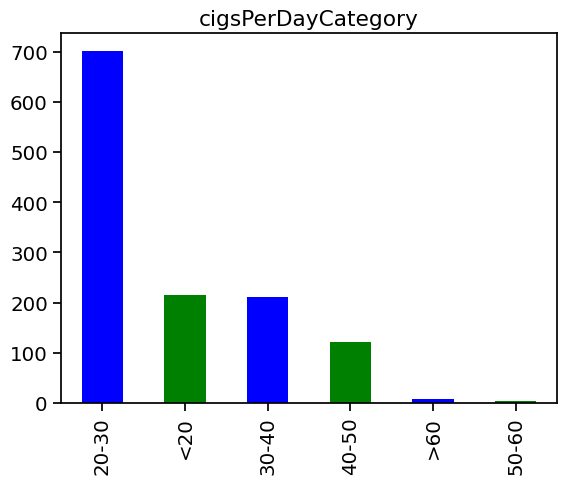

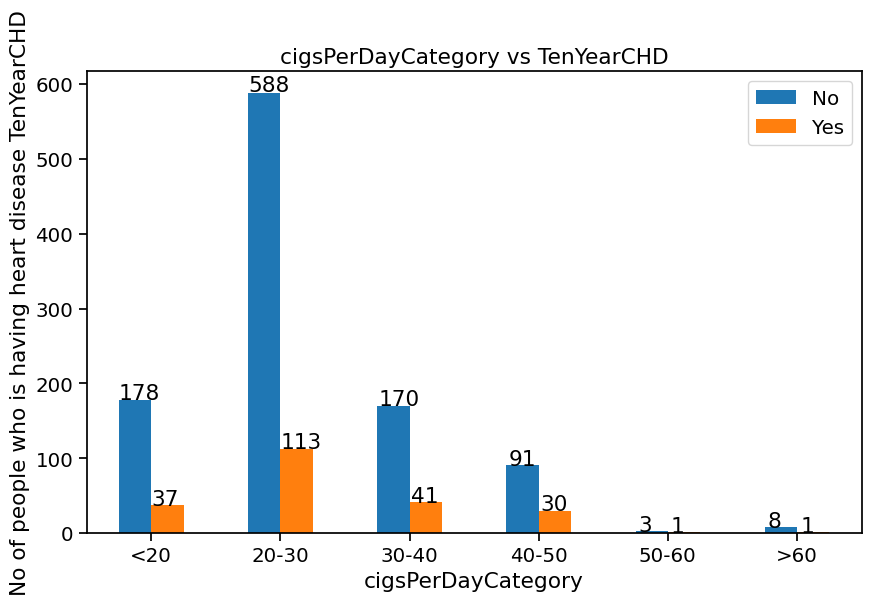

In [44]:
#Grouping cigsPerDay into category using binning method for better analysis on data distribution

heartdisease_df['cigsPerDayCategory'] = pd.cut(x=heartdisease_df['cigsPerDay'], bins=[10,19,29,39,49,59,69],labels=['<20','20-30','30-40','40-50','50-60','>60'])
print(heartdisease_df['cigsPerDayCategory'].isnull().sum())
heartdisease_df['cigsPerDayCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="cigsPerDayCategory")
crosstabplot(heartdisease_df,'cigsPerDayCategory','TenYearCHD')

0


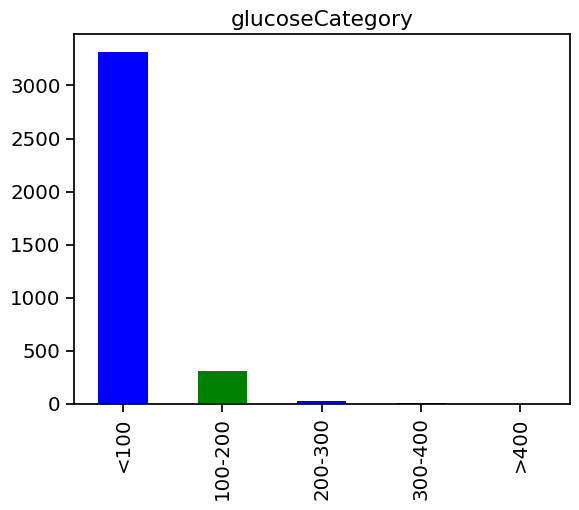

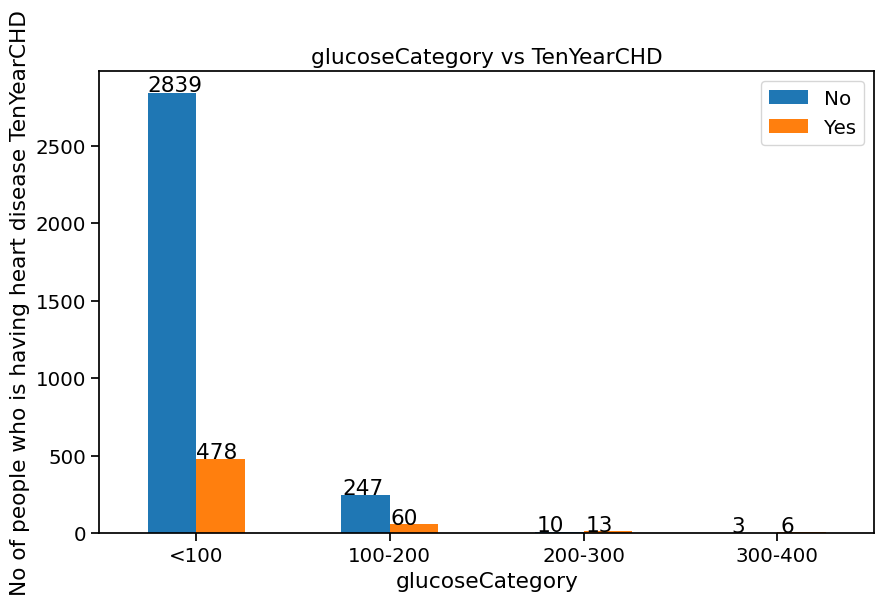

In [45]:
#Grouping glucose into category using binning method for better analysis on data distribution

heartdisease_df['glucoseCategory'] = pd.cut(x=heartdisease_df['glucose'], bins=[0,99,199,299,399,499],labels=['<100','100-200','200-300','300-400','>400'])
print(heartdisease_df['glucoseCategory'].isnull().sum())
heartdisease_df['glucoseCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="glucoseCategory")
crosstabplot(heartdisease_df,'glucoseCategory','TenYearCHD')

0


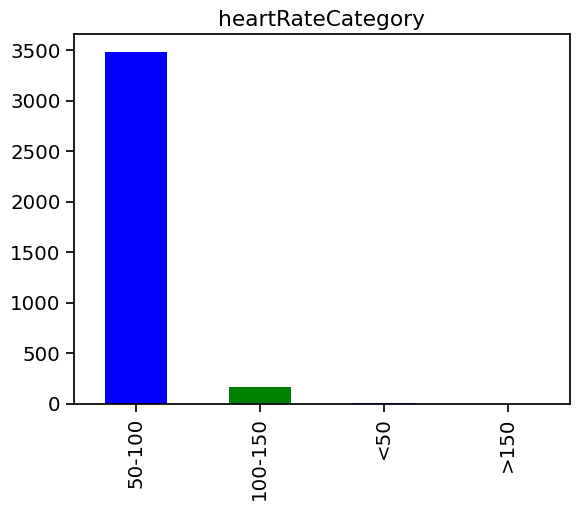

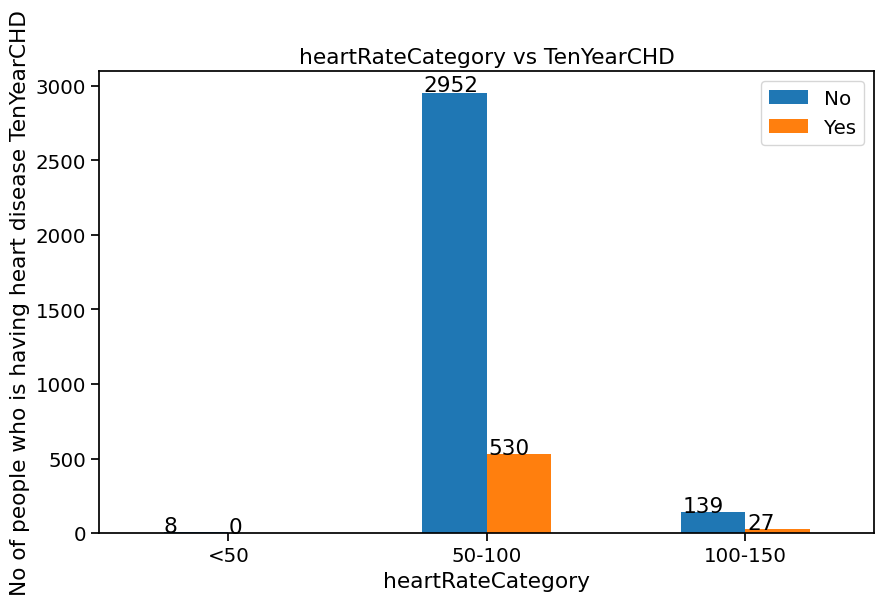

In [46]:
#Grouping heartRate into category using binning method for better analysis on data distribution

heartdisease_df['heartRateCategory'] = pd.cut(x=heartdisease_df['heartRate'], bins=[0,49,99,149,199],labels=['<50','50-100','100-150','>150'])
print(heartdisease_df['heartRateCategory'].isnull().sum())
heartdisease_df['heartRateCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="heartRateCategory")
crosstabplot(heartdisease_df,'heartRateCategory','TenYearCHD')

0


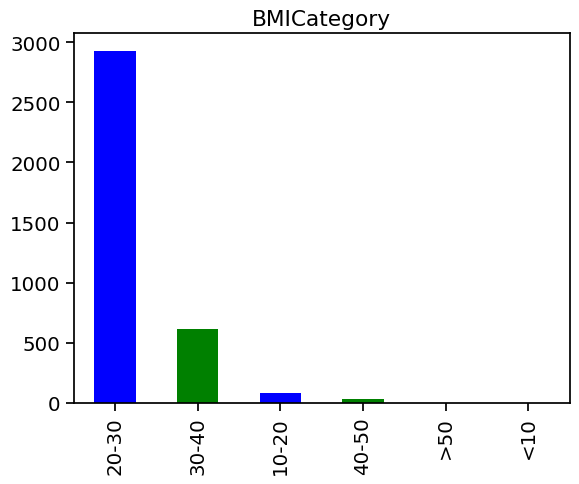

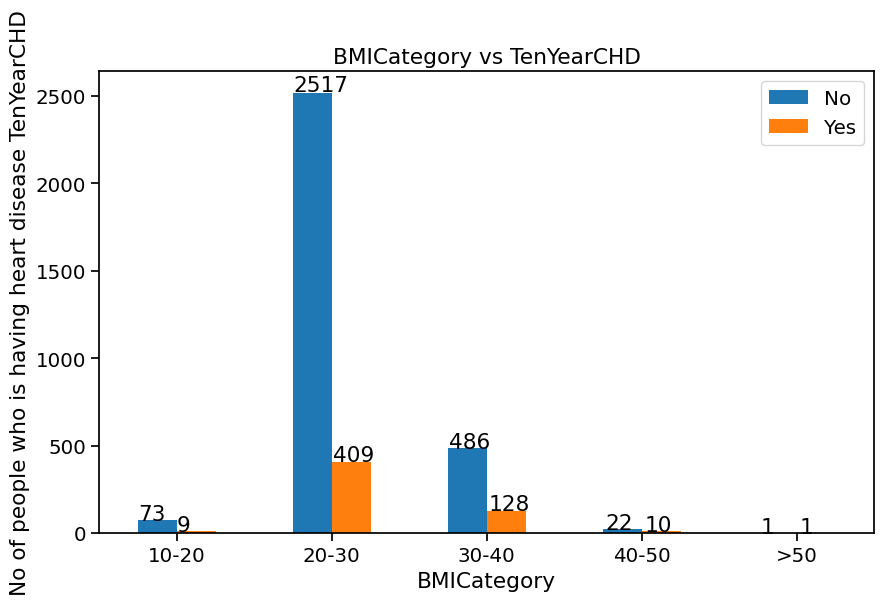

In [47]:
#Grouping BMI into category using binning method for better analysis on data distribution

heartdisease_df['BMICategory'] = pd.cut(x=heartdisease_df['BMI'], bins=[0,9,19,29,39,49,59],labels=['<10','10-20','20-30','30-40','40-50','>50'])
print(heartdisease_df['BMICategory'].isnull().sum())
heartdisease_df['BMICategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="BMICategory")
crosstabplot(heartdisease_df,'BMICategory','TenYearCHD')

0


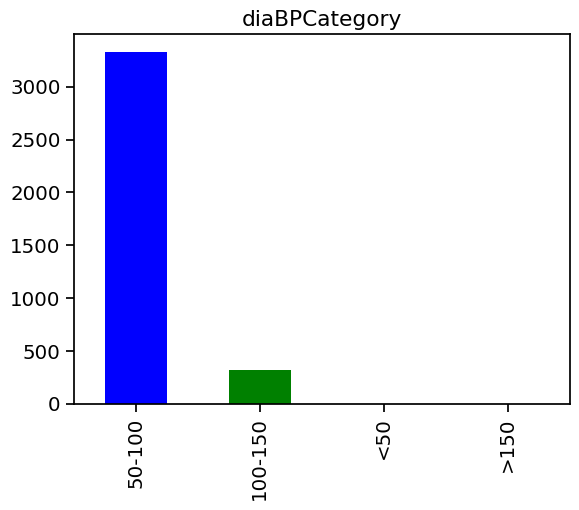

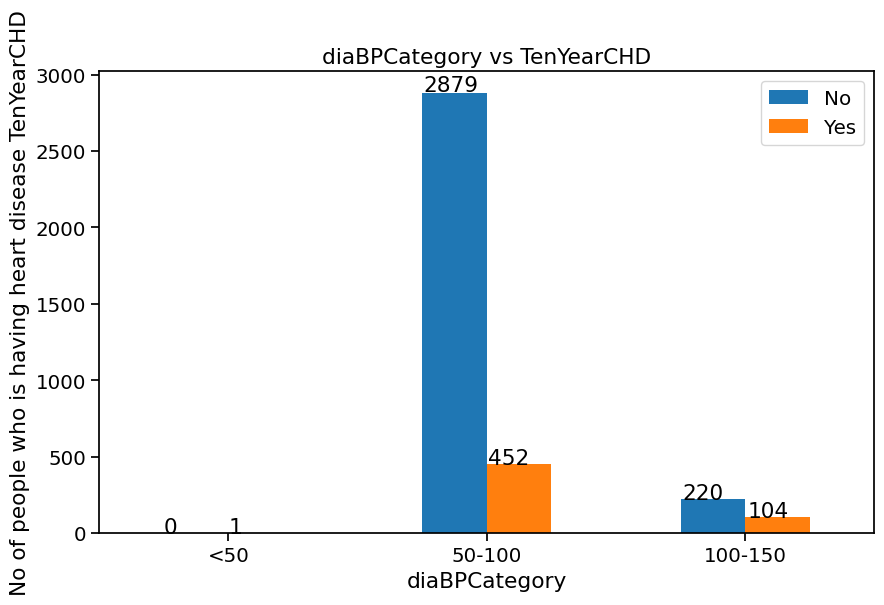

In [48]:
#Grouping diaBP into category using binning method for better analysis on data distribution

heartdisease_df['diaBPCategory'] = pd.cut(x=heartdisease_df['diaBP'], bins=[0,49,99,149,199],labels=['<50','50-100','100-150','>150'])
print(heartdisease_df['diaBPCategory'].isnull().sum())
heartdisease_df['diaBPCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="diaBPCategory")
crosstabplot(heartdisease_df,'diaBPCategory','TenYearCHD')

0


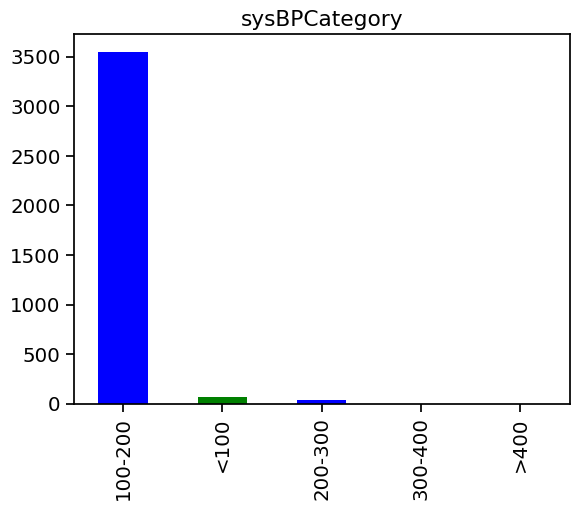

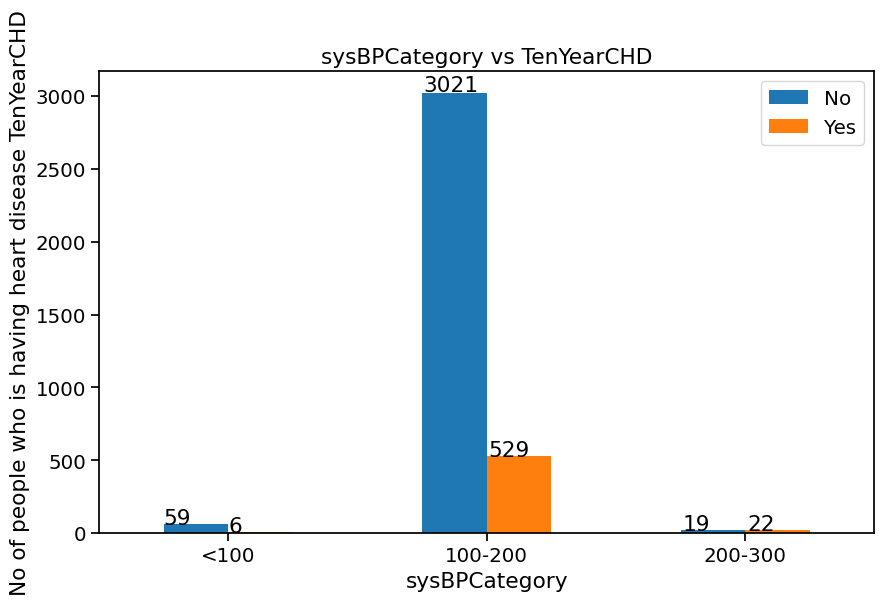

In [49]:
#Grouping sysBP into category using binning method for better analysis on data distribution

heartdisease_df['sysBPCategory'] = pd.cut(x=heartdisease_df['sysBP'], bins=[0,99,199,299,399,499],labels=['<100','100-200','200-300','300-400','>400'])
print(heartdisease_df['sysBPCategory'].isnull().sum())
heartdisease_df['sysBPCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="sysBPCategory")
crosstabplot(heartdisease_df,'sysBPCategory','TenYearCHD')

0


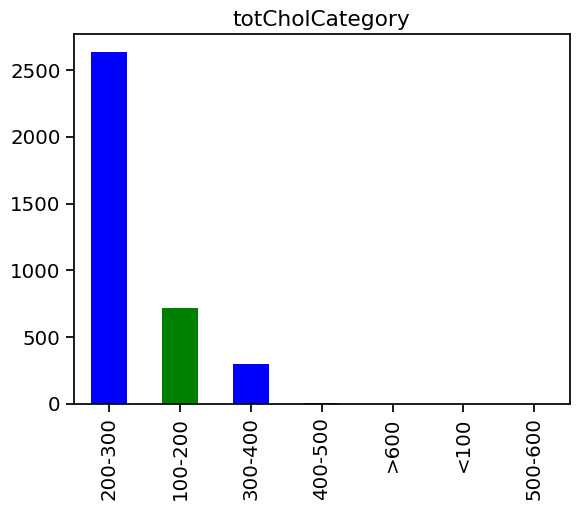

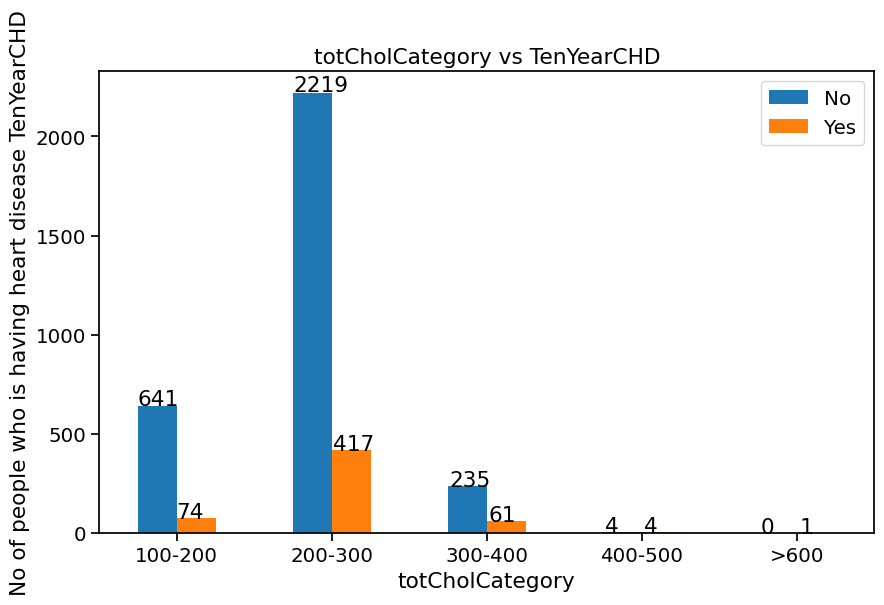

In [50]:
#Grouping totChol into category using binning method for better analysis on data distribution

heartdisease_df['totCholCategory'] = pd.cut(x=heartdisease_df['totChol'], bins=[0,99,199,299,399,499,599,699],labels=['<100','100-200','200-300','300-400','400-500','500-600','>600'])
print(heartdisease_df['totCholCategory'].isnull().sum())
heartdisease_df['totCholCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="totCholCategory")
crosstabplot(heartdisease_df,'totCholCategory','TenYearCHD')

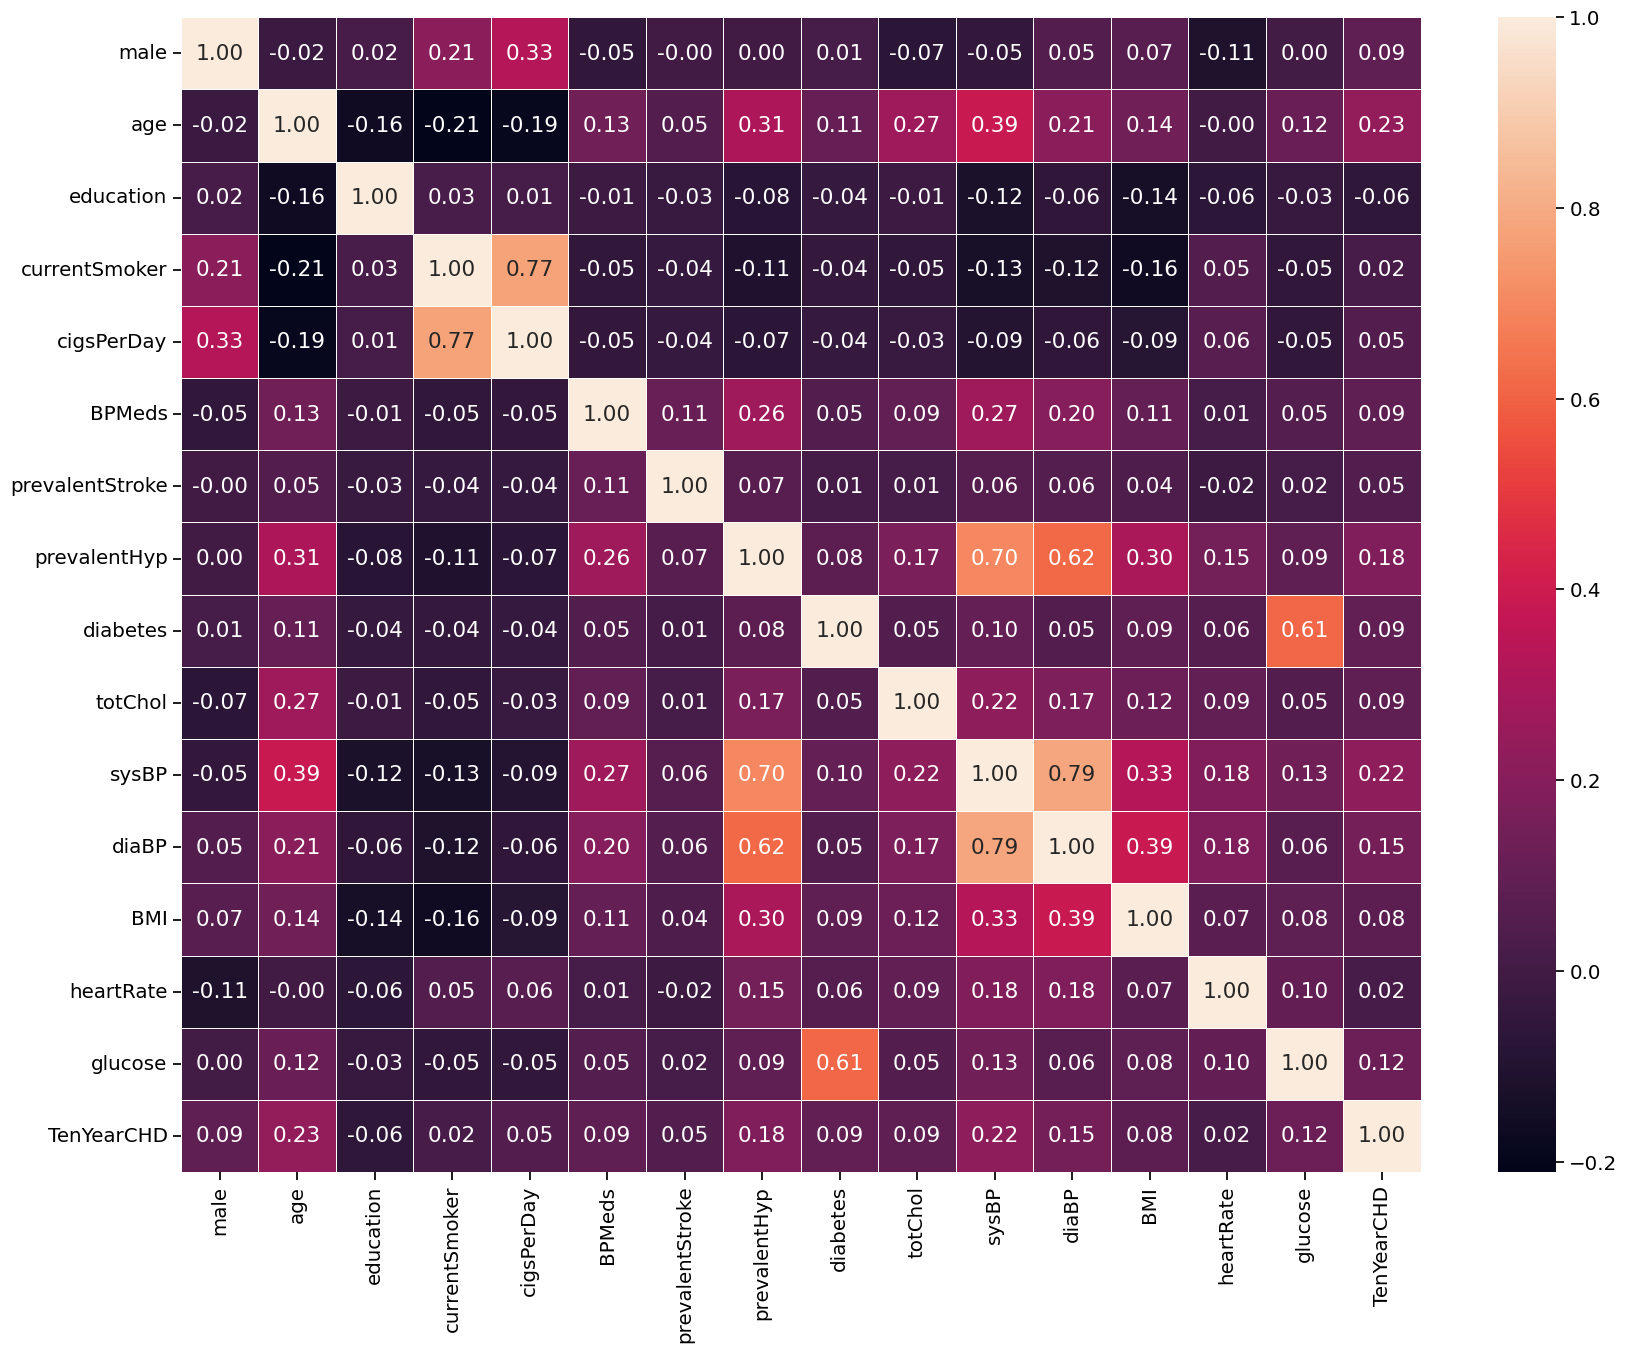

In [51]:
# Let's identify the target variable and other features how they are corelated using coefficient matrix
import seaborn as sns
heartdisease_corr_matrix=heartdisease_df.corr()
sns.set_context('notebook',font_scale = 1.3)
fig,heartdiseasematrix=plt.subplots(figsize=(20,15))
heartdiseasematrix=sns.heatmap(heartdisease_corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )


<h3> Coorelation Observation : From the above graph, it can be seen that 'Male,  age, education, BPMeds, prevalentStroke, totChol, BMI, heartRate' are not related the heart disease and it will not be helpful in including this in feature selection for predicting heart disease. Only if features are corelated, it will enable to predict heart disease </h3>

<h2> Data Preprocessing and cleaning </h2>

<h3> As part of exploration, data will null check are cleaned up. NA values in the dataset are removed . 
Per the exploratory analysis, dont see any data which is skewed, missing or outliers in the dataset</h3>

In [52]:
#Rename the target variable in the final dataset
heartdisease_df.rename(columns={"TenYearCHD":'HeartDisease'},inplace=True)
heartdisease_df = heartdisease_df.drop(columns='diaBPCategory')
heartdisease_df = heartdisease_df.drop(columns='BMICategory')
heartdisease_df =heartdisease_df.drop(columns='heartRateCategory')
heartdisease_df =heartdisease_df.drop(columns='glucoseCategory')
heartdisease_df =heartdisease_df.drop(columns='cigsPerDayCategory')
heartdisease_df =heartdisease_df.drop(columns='AgeCategory')
heartdisease_df =heartdisease_df.drop(columns='sysBPCategory')
heartdisease_df= heartdisease_df.drop(columns='totCholCategory')

print('Final Data set :{0}'.format(heartdisease_df.shape))

Final Data set :(3656, 16)


In [53]:
#split the data in to 'x' and 'y' and normalise

x=heartdisease_df.drop(columns='HeartDisease')
y=heartdisease_df['HeartDisease']
y.value_counts() #Check the data is balanced or not 




0    3099
1     557
Name: HeartDisease, dtype: int64

           Features  Importances
6   prevalentStroke     0.003178
8          diabetes     0.006433
5            BPMeds     0.006718
3     currentSmoker     0.012624
7      prevalentHyp     0.018500
0              male     0.021281
2         education     0.035961
4        cigsPerDay     0.049678
13        heartRate     0.097785
11            diaBP     0.118864
14          glucose     0.119297
9           totChol     0.122207
1               age     0.123760
12              BMI     0.127909
10            sysBP     0.135804


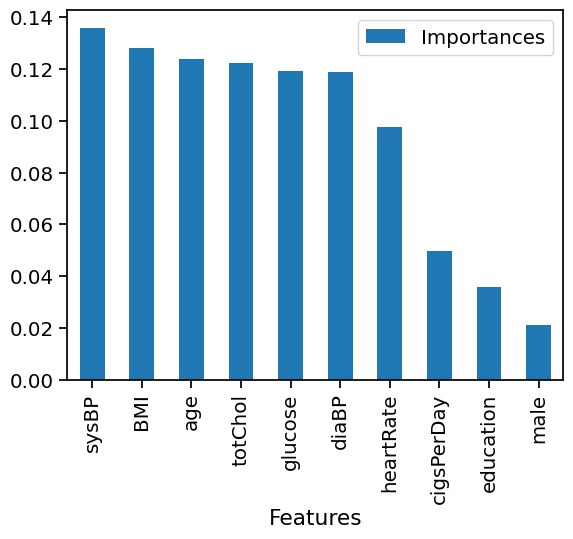

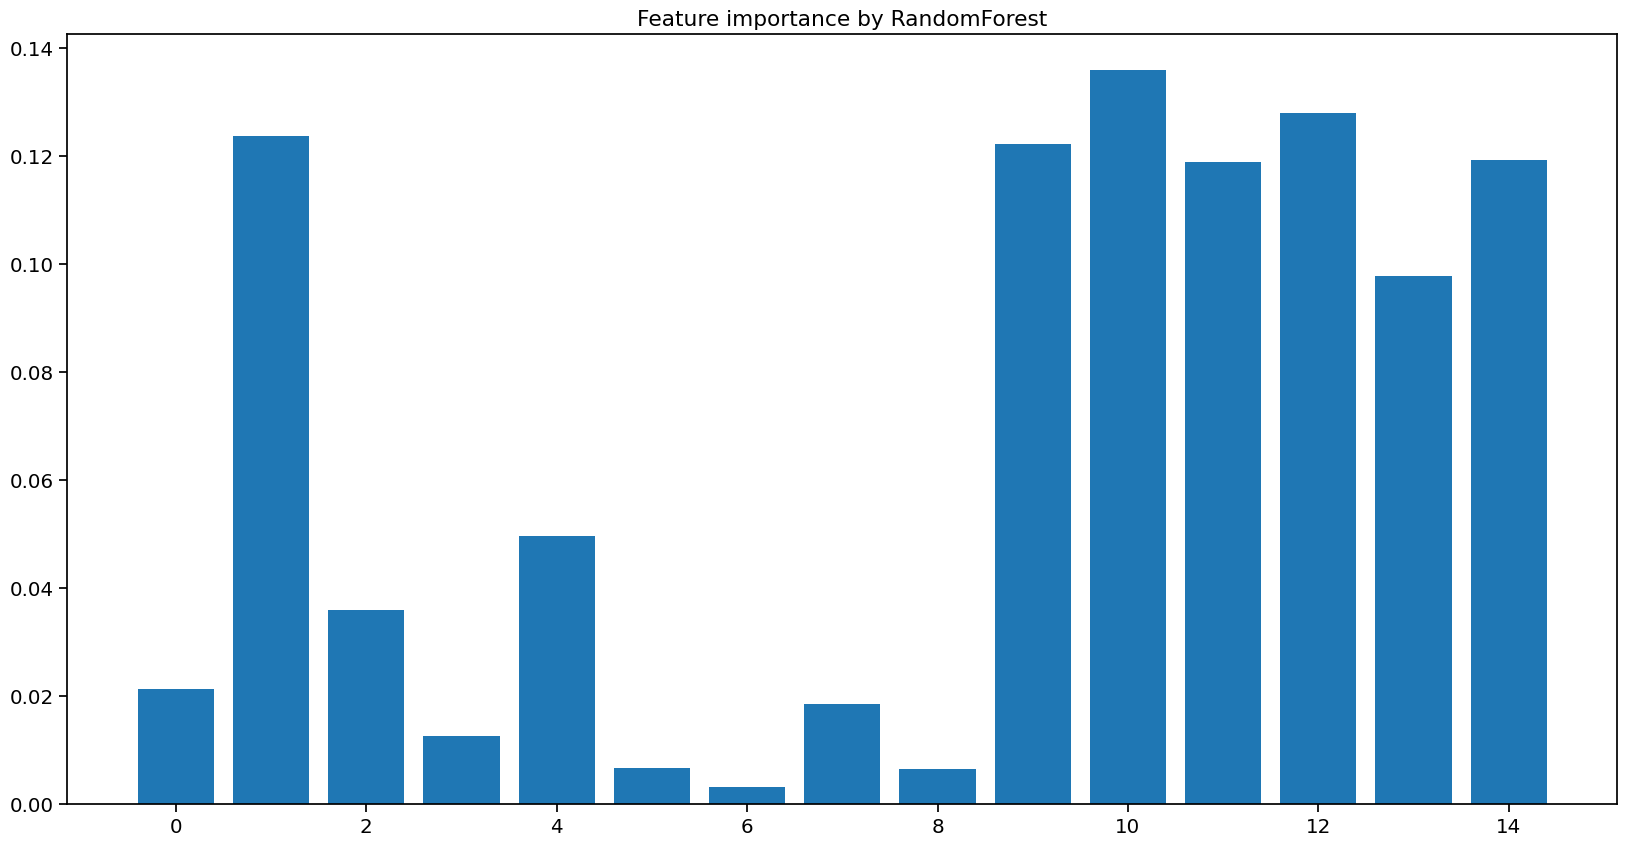

In [54]:
#Feature Importance using RandomForestClassifier technique
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(x,y)
importances_random = model.feature_importances_

heartdisease_df=pd.DataFrame({"Features": x.columns,"Importances":importances_random})
heartdisease_df.set_index('Importances')
heartdisease_df= heartdisease_df.sort_values('Importances')
print(heartdisease_df)
heartdisease_df.nlargest(10,'Importances').plot.bar('Features','Importances')

plt.figure(figsize=(20,10))
plt.title('Feature importance by RandomForest')
plt.bar([x for x in range(len(importances_random))],importances_random)
plt.show()

<h3> Random Forest Algorithm : This is a Bagging Algorithm which aggregates a specified number of decision trees. These decrease impurities (Gini Impurity) over all trees & improve purity of then node. At start of the trees, greatest decrease in impurity will be at start of the trees and nodes with the least decrease in impurity occur at the end of trees. This will help in selecting feature of most importance.</h3>

C:\Users\Santhi Nandakumar\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


           Features  Importances
6   prevalentStroke     0.032518
8          diabetes     0.047026
3     currentSmoker     0.047070
13        heartRate     0.058584
9           totChol     0.059545
12              BMI     0.060501
11            diaBP     0.060697
2         education     0.061040
14          glucose     0.063915
10            sysBP     0.069945
4        cigsPerDay     0.070457
7      prevalentHyp     0.081441
0              male     0.084953
1               age     0.097899
5            BPMeds     0.104408


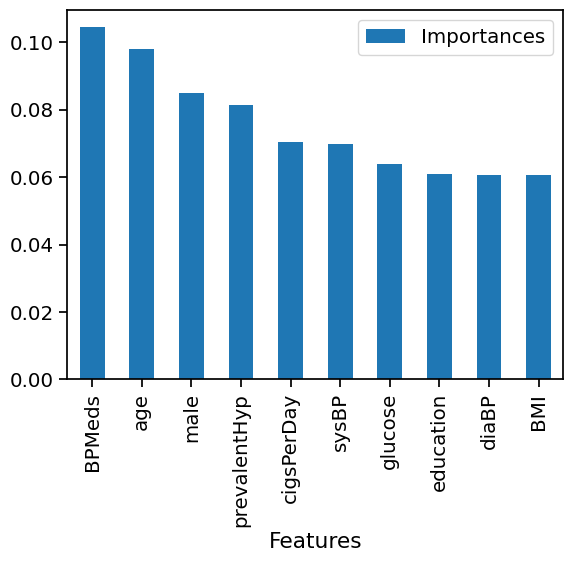

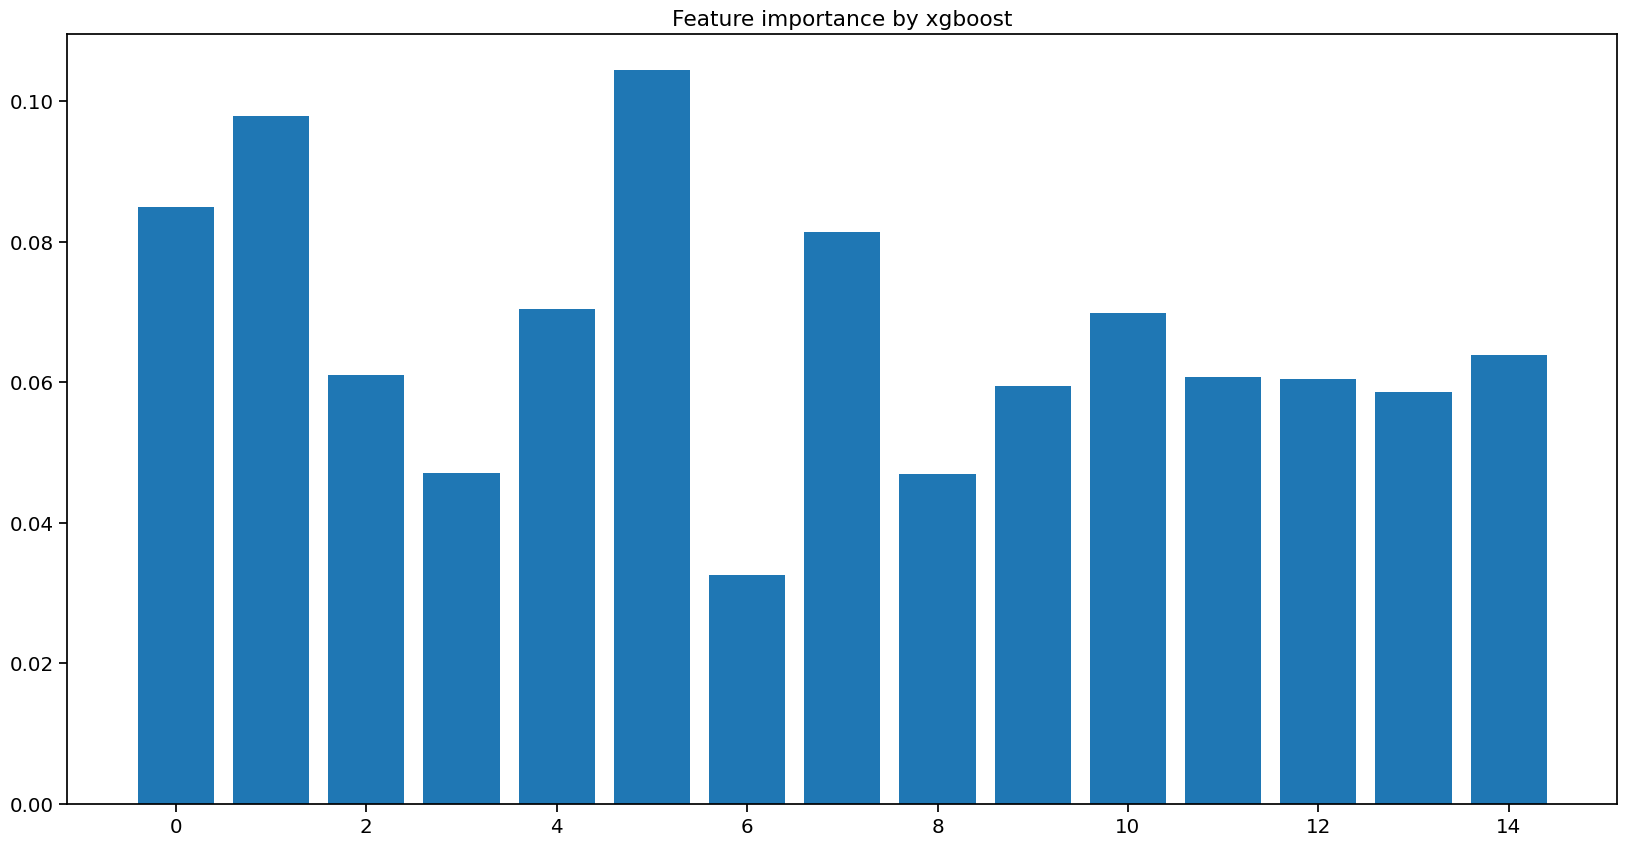

In [55]:
#Feature Importance by xgboost technique
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBClassifier(use_label_encoder=False)
xgb.fit(x,y)

importances=xgb.feature_importances_
columns=x.columns

heartdisease_df=pd.DataFrame({"Features": x.columns,"Importances":importances})
heartdisease_df.set_index('Importances')
heartdisease_df= heartdisease_df.sort_values('Importances')
print(heartdisease_df)

heartdisease_df.nlargest(10,'Importances').plot.bar('Features','Importances')
plt.figure(figsize=(20,10))
plt.title('Feature importance by xgboost')
plt.bar([x for x in range(len(importances))],importances)
plt.show()

<h3> XGBoost Algorithm : Gradient boosting automatically provides estimates of feature importance from a trained predictive model. After boosted trees are constructed, it is easy to retrieve importance scores for each attributes.</h3>

In [56]:
#Train/test split creation
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size = 0.9, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.9, random_state = 0)

<h3>Scaling of features is essential in modeling the algorithms as data is derived through various ways . It leads to a biased outcome 
of prediction in terms of misclassification error and accuracy rates. </h3>

<h3>Standardization is a technique used to convert the statistical distribution of the data into the format mean-0, standard deviation - 1</h3>

<h2> Model Building </h2>

In [57]:
#Explore K-Fold cross validation
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train1, y_train1)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train1.iloc[train, :], y_train1.iloc[train])
    score = pipeline.score(x_train1.iloc[test, :], y_train1.iloc[test])
    scores.append(score)
    print('Fold Case1: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train1.iloc[train]), score))
 
print('\n\nCross-Validation accuracy Case1: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold Case1:  1, Training/Test Split Distribution: [2228  403], Accuracy: 0.846
Fold Case1:  2, Training/Test Split Distribution: [2228  403], Accuracy: 0.846
Fold Case1:  3, Training/Test Split Distribution: [2228  403], Accuracy: 0.850
Fold Case1:  4, Training/Test Split Distribution: [2228  403], Accuracy: 0.846
Fold Case1:  5, Training/Test Split Distribution: [2228  404], Accuracy: 0.846
Fold Case1:  6, Training/Test Split Distribution: [2228  404], Accuracy: 0.849
Fold Case1:  7, Training/Test Split Distribution: [2229  403], Accuracy: 0.846
Fold Case1:  8, Training/Test Split Distribution: [2229  403], Accuracy: 0.846
Fold Case1:  9, Training/Test Split Distribution: [2229  403], Accuracy: 0.846
Fold Case1: 10, Training/Test Split Distribution: [2229  403], Accuracy: 0.846


Cross-Validation accuracy Case1: 0.847 +/- 0.001


In [58]:
#Explore K-Fold cross validation
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train2, y_train2)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train2.iloc[train, :], y_train2.iloc[train])
    score = pipeline.score(x_train2.iloc[test, :], y_train2.iloc[test])
    scores.append(score)
    print('Fold Case1: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train2.iloc[train]), score))
 
print('\n\nCross-Validation accuracy Case2: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold Case1:  1, Training/Test Split Distribution: [288  40], Accuracy: 0.865
Fold Case1:  2, Training/Test Split Distribution: [288  40], Accuracy: 0.865
Fold Case1:  3, Training/Test Split Distribution: [288  40], Accuracy: 0.865
Fold Case1:  4, Training/Test Split Distribution: [288  40], Accuracy: 0.865
Fold Case1:  5, Training/Test Split Distribution: [288  40], Accuracy: 0.865
Fold Case1:  6, Training/Test Split Distribution: [288  41], Accuracy: 0.889
Fold Case1:  7, Training/Test Split Distribution: [288  41], Accuracy: 0.889
Fold Case1:  8, Training/Test Split Distribution: [288  41], Accuracy: 0.889
Fold Case1:  9, Training/Test Split Distribution: [288  41], Accuracy: 0.889
Fold Case1: 10, Training/Test Split Distribution: [288  41], Accuracy: 0.889


Cross-Validation accuracy Case2: 0.877 +/- 0.012


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [60]:
#Modeling & predicting using LogisticRegression -
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot

#Model and train creation for Case 1
model = LogisticRegression(solver='saga', max_iter=10000,penalty ='none')
model.fit(x_train1,y_train1)
print('Training Data LR Case1: {0}'.format(x_train1.shape))
print('Test Data LR Case1: {0}'.format(x_test1.shape))

#predict the results for training model
log_pred_random_train = model.predict(x_train1)
print('Accuracy_score training data set Case1: {0}'.format(accuracy_score(y_train1, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test1)

#test the accuracy of the prediction
lb_acc_score_case1 = accuracy_score(y_test1, log_pred_random)
lb_acc_score_case1_train = accuracy_score(y_train1, log_pred_random_train)

print('Accuracy_score Logistic R Case1: {0}'.format(accuracy_score(y_test1,log_pred_random)))
print('Classification Report Logistic R Case1: {0}'.format(classification_report(y_test1,log_pred_random)))
print('Confusion Matrix Logistic R Case1: {0}'.format(confusion_matrix(y_test1,log_pred_random)))




#Model and train creation for Case 2
model = LogisticRegression(solver='saga', max_iter=10000,penalty ='none')
model.fit(x_train2,y_train2)
print('Training Data LR Case1: {0}'.format(x_train2.shape))
print('Test Data LR Case1: {0}'.format(x_test2.shape))

#predict the results for training model
log_pred_random_train = model.predict(x_train2)
print('Accuracy_score training data set Case1: {0}'.format(accuracy_score(y_train2, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test2)

#test the accuracy of the prediction
lb_acc_score_case2 = accuracy_score(y_test2, log_pred_random)
lb_acc_score_case2_train = accuracy_score(y_train2, log_pred_random_train)

print('Accuracy_score Logistic R Case1: {0}'.format(accuracy_score(y_test2,log_pred_random)))
print('Classification Report Logistic R Case1: {0}'.format(classification_report(y_test2,log_pred_random)))
print('Confusion Matrix Logistic R Case1: {0}'.format(confusion_matrix(y_test2,log_pred_random)))





Training Data LR Case1: (2924, 15)
Test Data LR Case1: (732, 15)
Accuracy_score training data set Case1: 0.853625170998632
Accuracy_score Logistic R Case1: 0.8538251366120219
Classification Report Logistic R Case1:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.57      0.07      0.13       109

    accuracy                           0.85       732
   macro avg       0.72      0.53      0.53       732
weighted avg       0.82      0.85      0.80       732

Confusion Matrix Logistic R Case1: [[617   6]
 [101   8]]
Training Data LR Case1: (365, 15)
Test Data LR Case1: (3291, 15)
Accuracy_score training data set Case1: 0.8794520547945206
Accuracy_score Logistic R Case1: 0.8468550592525068
Classification Report Logistic R Case1:               precision    recall  f1-score   support

           0       0.85      0.99      0.92      2779
           1       0.58      0.06      0.10       512

    accuracy        

In [61]:
#Modeling & predicting using Maximum Likelihood Estimater ( naivebayes algorithm) 

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB


m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train1,y_train1)
nbpred_train = nb.predict(x_train1)
nbpred = nb.predict(x_test1)
nb_conf_matrix = confusion_matrix(y_test1, nbpred)
nb_acc_score_case1_train = accuracy_score(y_train1, nbpred_train)
nb_acc_score_case1 = accuracy_score(y_test1, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of MLE Naive Bayes model for Case1:",nb_acc_score_case1*100,'\n')
print(classification_report(y_test1,nbpred))

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train2,y_train2)
nbpred_train = nb.predict(x_train2)
nbpred = nb.predict(x_test2)
nb_conf_matrix = confusion_matrix(y_test2, nbpred)
nb_acc_score_case2_train = accuracy_score(y_train2, nbpred_train)
nb_acc_score_case2 = accuracy_score(y_test2, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of MLE Naive Bayes model for case2:",nb_acc_score_case2*100,'\n')
print(classification_report(y_test2,nbpred))


confussion matrix
[[583  40]
 [ 89  20]]


Accuracy of MLE Naive Bayes model for Case1: 82.37704918032787 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       623
           1       0.33      0.18      0.24       109

    accuracy                           0.82       732
   macro avg       0.60      0.56      0.57       732
weighted avg       0.79      0.82      0.80       732

confussion matrix
[[  11 2768]
 [   8  504]]


Accuracy of MLE Naive Bayes model for case2: 15.648738985110908 

              precision    recall  f1-score   support

           0       0.58      0.00      0.01      2779
           1       0.15      0.98      0.27       512

    accuracy                           0.16      3291
   macro avg       0.37      0.49      0.14      3291
weighted avg       0.51      0.16      0.05      3291



<h3> Regularisation </h3>
<h4> Regularisation is used when we have overfitting problem. This dataset have overfitting problem and for linear regression we will be using L1 & L2 technique and for MLE - Naive Bayes we will user var_smoothing </h4>

In [62]:
# 3) Regularisation

#Modeling & predicting using LogisticRegression - RandomForestClassifier feature selection technique

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



#Model and train creation for Case 1 & penalty - L1
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l1')
model.fit(x_train1,y_train1)
print('Training Data LR Case1: {0}'.format(x_train1.shape))
print('Test Data LR Case1: {0}'.format(x_test1.shape))
print('Non Zero weights:',np.count_nonzero(model.coef_))

#predict the results for training model
log_pred_random_train = model.predict(x_train1)
lb_acc_score_regL1case1_train = format(accuracy_score(y_train1, log_pred_random_train))
print('Accuracy_score training data set Case1: {0}'.format(accuracy_score(y_train1, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test1)

#test the accuracy of the prediction
lb_acc_score_regL1case1 = accuracy_score(y_test1, log_pred_random)

print('Accuracy_score Logistic Regression with Case1 & penalty L1: {0}'.format(accuracy_score(y_test1,log_pred_random)))
print('Classification Report Logistic Regression with Case1 & penalty L1: {0}'.format(classification_report(y_test1,log_pred_random)))
print('Confusion Matrix Logistic Regression with Case1 & penalty L1: {0}'.format(confusion_matrix(y_test1,log_pred_random)))

#Model and train creation for Case 1 & penalty - L2
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l2')
model.fit(x_train1,y_train1)
print('Training Data LR Case1: {0}'.format(x_train1.shape))
print('Test Data LR Case1: {0}'.format(x_test1.shape))
print('Non Zero weights:',np.count_nonzero(model.coef_))

#predict the results for training model
log_pred_random_train = model.predict(x_train1)
lb_acc_score_regL2case1_train = format(accuracy_score(y_train1, log_pred_random_train))
print('Accuracy_score training data set Case1: {0}'.format(accuracy_score(y_train1, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test1)

#test the accuracy of the prediction
lb_acc_score_regL2case1 = accuracy_score(y_test1, log_pred_random)

print('Accuracy_score Logistic Regression with Case1 & penalty L2: {0}'.format(accuracy_score(y_test1,log_pred_random)))
print('Classification Report Logistic Regression with Case1 & penalty L2: {0}'.format(classification_report(y_test1,log_pred_random)))
print('Confusion Matrix Logistic Regression with Case1 & penalty L2: {0}'.format(confusion_matrix(y_test1,log_pred_random)))


#Model and train creation for Case 2 & penalty - L1
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l1')
model.fit(x_train2,y_train2)
print('Training Data LR Case2: {0}'.format(x_train2.shape))
print('Test Data LR Case2: {0}'.format(x_test2.shape))

#predict the results for training model
log_pred_random_train = model.predict(x_train2)
lb_acc_score_regL1case2_train = format(accuracy_score(y_train2, log_pred_random_train))
print('Accuracy_score training data set Case2: {0}'.format(accuracy_score(y_train2, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test2)

#test the accuracy of the prediction
lb_acc_score_regL1case2 =accuracy_score(y_test2, log_pred_random)

print('Accuracy_score Logistic Regression with Case2 & penalty L1: {0}'.format(accuracy_score(y_test2,log_pred_random)))
print('Classification Report Logistic Regression with Case2 & penalty L1: {0}'.format(classification_report(y_test2,log_pred_random)))
print('Confusion Matrix Logistic Regression with Case2 & penalty L1: {0}'.format(confusion_matrix(y_test2,log_pred_random)))


#Model and train creation for Case 2 & penalty - L2
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l2')
model.fit(x_train2,y_train2)
print('Training Data LR Case2: {0}'.format(x_train2.shape))
print('Test Data LR Case2: {0}'.format(x_test2.shape))

#predict the results for training model
log_pred_random_train = model.predict(x_train2)
lb_acc_score_regL2case2_train = format(accuracy_score(y_train2, log_pred_random_train))
print('Accuracy_score training data set Case2: {0}'.format(accuracy_score(y_train2, log_pred_random_train)))

#predict the results for test model
log_pred_random = model.predict(x_test2)

#test the accuracy of the prediction
lb_acc_score_regL2case2 = accuracy_score(y_test2, log_pred_random)

print('Accuracy_score Logistic Regression with Case2 & penalty L2: {0}'.format(accuracy_score(y_test2,log_pred_random)))
print('Classification Report Logistic Regression with Case2 & penalty L2: {0}'.format(classification_report(y_test2,log_pred_random)))
print('Confusion Matrix Logistic Regression with Case2 & penalty L2: {0}'.format(confusion_matrix(y_test2,log_pred_random)))




Training Data LR Case1: (2924, 15)
Test Data LR Case1: (732, 15)
Non Zero weights: 15
Accuracy_score training data set Case1: 0.853625170998632
Accuracy_score Logistic Regression with Case1 & penalty L1: 0.8538251366120219
Classification Report Logistic Regression with Case1 & penalty L1:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.57      0.07      0.13       109

    accuracy                           0.85       732
   macro avg       0.72      0.53      0.53       732
weighted avg       0.82      0.85      0.80       732

Confusion Matrix Logistic Regression with Case1 & penalty L1: [[617   6]
 [101   8]]
Training Data LR Case1: (2924, 15)
Test Data LR Case1: (732, 15)
Non Zero weights: 15
Accuracy_score training data set Case1: 0.853625170998632
Accuracy_score Logistic Regression with Case1 & penalty L2: 0.8538251366120219
Classification Report Logistic Regression with Case1 & penalty L2:         

In [63]:
#Regularisation for Maximum Likelihood Estimater ( naivebayes algorithm) 

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB


m2 = 'Naive Bayes'
nb = GaussianNB(var_smoothing =0.1)
nb.fit(x_train1,y_train1)
nbpred_regcase1 = nb.predict(x_test1)
nbpred_regcase1_train = nb.predict(x_train1)
nb_conf_matrix = confusion_matrix(y_test1, nbpred_regcase1)
nb_acc_score_regcase1 = accuracy_score(y_test1, nbpred_regcase1)
nb_acc_score_regcase1_train = accuracy_score(y_train1, nbpred_regcase1_train)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model for Case1:",nb_acc_score_regcase1*100,'\n')
print(classification_report(y_test1,nbpred_regcase1))

m2 = 'Naive Bayes'
nb = GaussianNB(var_smoothing =0.1)
nb.fit(x_train2,y_train2)
nbpred_regcase2 = nb.predict(x_test2)
nbpred_regcase2_train = nb.predict(x_train2)
nb_conf_matrix = confusion_matrix(y_test2, nbpred_regcase2)
nb_acc_score_regcase2 = accuracy_score(y_test2, nbpred_regcase2)
nb_acc_score_regcase2_train = accuracy_score(y_train2, nbpred_regcase2_train)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model for case2:",nb_acc_score_regcase2*100,'\n')
print(classification_report(y_test2,nbpred_regcase2))

confussion matrix
[[587  36]
 [ 92  17]]


Accuracy of Naive Bayes model for Case1: 82.5136612021858 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       623
           1       0.32      0.16      0.21       109

    accuracy                           0.83       732
   macro avg       0.59      0.55      0.56       732
weighted avg       0.78      0.83      0.80       732

confussion matrix
[[2531  248]
 [ 392  120]]


Accuracy of Naive Bayes model for case2: 80.55302339714373 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2779
           1       0.33      0.23      0.27       512

    accuracy                           0.81      3291
   macro avg       0.60      0.57      0.58      3291
weighted avg       0.78      0.81      0.79      3291



In [64]:
!pip install texttable

Defaulting to user installation because normal site-packages is not writeable


In [65]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Features', 'Case1_AccuracyTest_NonRegularized','Case1_AccuracyTest_Regularized'], ['Naive Bayes', nb_acc_score_case1,nb_acc_score_regcase1],['Logistic Regression', lb_acc_score_case1, ' L1 - '+str(lb_acc_score_regL1case1)+ ', L2 - '+str(lb_acc_score_regL2case1)]])
print(t.draw())

from texttable import Texttable
t = Texttable()
t.add_rows([['Features', 'Case1_AccuracyTrain_NonRegularized','Case1_AccuracyTrain_Regularized'], ['Naive Bayes', nb_acc_score_case1_train,nb_acc_score_regcase1_train],['Logistic Regression', lb_acc_score_case1_train, ' L1 - '+str(lb_acc_score_regL1case1_train)+ ', L2 - '+str(lb_acc_score_regL2case1_train)]])
print(t.draw())

from texttable import Texttable
t = Texttable()
t.add_rows([['Features', 'Case2_AccuracyTest_Not Regularized','Case2_AccuracyTest_Regularized'], ['Naive Bayes ', nb_acc_score_case2,nb_acc_score_regcase2],['Logistic Regression', lb_acc_score_case2,' L1 - '+str(lb_acc_score_regL1case2)+ ', L2 - '+str(lb_acc_score_regL2case2)]])
print(t.draw())


from texttable import Texttable
t = Texttable()
t.add_rows([['Features', 'Case2_AccuracyTrain_Not Regularized','Case2_AccuracyTrain_Regularized'], ['Naive Bayes ', nb_acc_score_case2_train,nb_acc_score_regcase2_train],['Logistic Regression', lb_acc_score_case2_train,' L1 - '+str(lb_acc_score_regL1case2_train)+ ', L2 - '+str(lb_acc_score_regL2case2_train)]])
print(t.draw())

+---------------------+----------------------------+---------------------------+
|      Features       | Case1_AccuracyTest_NonRegu | Case1_AccuracyTest_Regula |
|                     |          larized           |           rized           |
+=====================+============================+===========================+
| Naive Bayes         | 0.824                      | 0.825                     |
+---------------------+----------------------------+---------------------------+
| Logistic Regression | 0.854                      |  L1 - 0.8538251366120219, |
|                     |                            | L2 - 0.8538251366120219   |
+---------------------+----------------------------+---------------------------+
+---------------------+----------------------------+---------------------------+
|      Features       | Case1_AccuracyTrain_NonReg | Case1_AccuracyTrain_Regul |
|                     |          ularized          |          arized           |
+=====================+=====

<h3>With non regularized data for case 2 - 90% test data, logistic regression seems to be performing better not naive bayes. Post regularization of data, both models seems to be performing better </h3>

<H2> Performance Evaluation</h2>

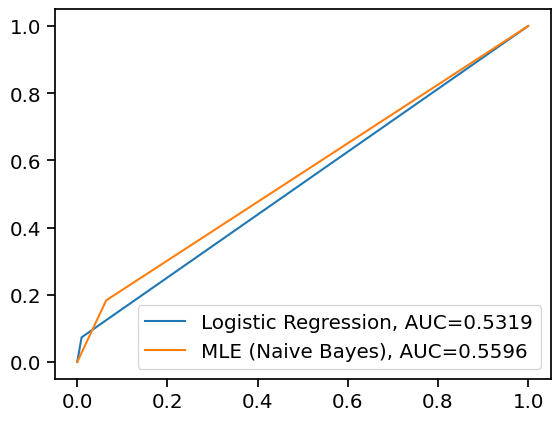

In [66]:
# Performance Evaluation - ROC curve for Case 1
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt


#Model and train creation for Case 1 & penalty - L1
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l1')
model.fit(x_train1,y_train1)

#predict the results for test model
log_pred_random = model.predict(x_test1)
fpr, tpr, _ = metrics.roc_curve(y_test1, log_pred_random)
auc = round(metrics.roc_auc_score(y_test1, log_pred_random), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train1,y_train1)
nbpred = nb.predict(x_test1)
fpr, tpr, _ = metrics.roc_curve(y_test1, nbpred)
auc = round(metrics.roc_auc_score(y_test1, nbpred), 4)
plt.plot(fpr,tpr,label="MLE (Naive Bayes), AUC="+str(auc))


#add legend
plt.legend()


<h3>  Receiver Operator Characteristic(ROC)- (Area Under Curve) AUC score is one of the metrics to assess the performance of a  model. ROC-AUC indicates the degree of seperability between predictions of postive and negative classes. Higher the score, higher the distinction and lower the crossover of the predictions of the two classes. </h3>

<h3> For case 1, for both the models value > 0.5 which indicates that there is high probability that  classifier will be able to distinguish the positive class values from the negative class values .As both model's AUC score is above > 0.5 , performance is not worse </h3>

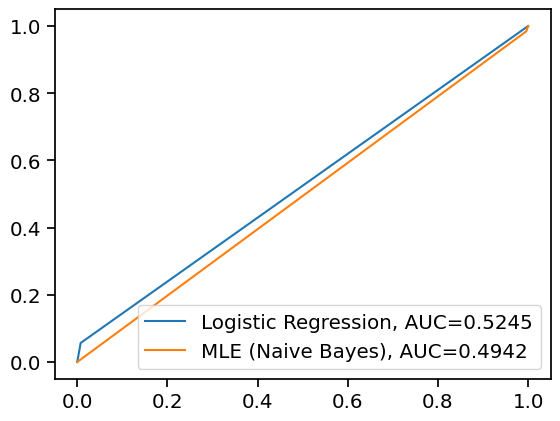

In [67]:
# Performance Evaluation - ROC curve for Case 2

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt


#Model and train creation for Case 1 & penalty - L1
model = LogisticRegression(solver='saga', max_iter=10000,C= 100, penalty= 'l1')
model.fit(x_train2,y_train2)

#predict the results for test model
log_pred_random = model.predict(x_test2)
fpr, tpr, _ = metrics.roc_curve(y_test2, log_pred_random)
auc = round(metrics.roc_auc_score(y_test2, log_pred_random), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train2,y_train2)
nbpred = nb.predict(x_test2)
fpr, tpr, _ = metrics.roc_curve(y_test2, nbpred)
auc = round(metrics.roc_auc_score(y_test2, nbpred), 4)
plt.plot(fpr,tpr,label="MLE (Naive Bayes), AUC="+str(auc))


#add legend
plt.legend()


<h3>For case 2, for Logistic regression value > 0.5 which indicates that there is high probability that  classifier will be able to distinguish the positive class values from the negative class values. But for MLE( Naive Bayes) model, value is 0.5 which indicates that there is no distinction between postive and negative class values. Performance for logistic regression is better than the MLE ( Naive Bayes)</h3>

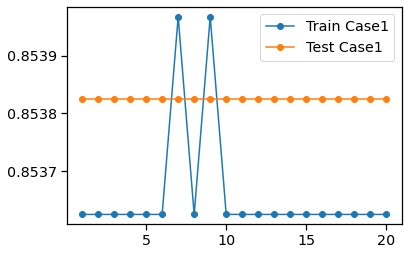

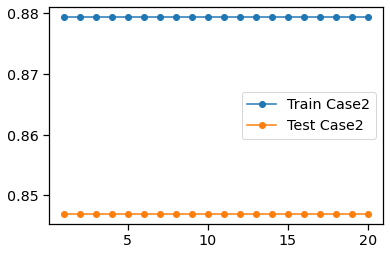

In [38]:
# Checing for overfitting or underfitting or just fit Model for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    #Model and train creation for Case 1
    model = LogisticRegression(solver='saga', max_iter=10000,penalty ='none')
    model.fit(x_train1,y_train1)

    #predict the results for training model
    log_pred_random_train = model.predict(x_train1)

    #predict the results for test model
    log_pred_random = model.predict(x_test1)

    #test the accuracy of the prediction
    lb_acc_score_case1 = accuracy_score(y_test1, log_pred_random)
    lb_acc_score_case1_train = accuracy_score(y_train1, log_pred_random_train)
    test_scores.append(lb_acc_score_case1)
    train_scores.append(lb_acc_score_case1_train)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train Case1')
pyplot.plot(values, test_scores, '-o', label='Test Case1')
pyplot.legend()
pyplot.show()


#Model and train creation for Case 2
train_scores1, test_scores1 = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    model = LogisticRegression(solver='saga', max_iter=10000,penalty ='none')
    model.fit(x_train2,y_train2)


    #predict the results for training model
    log_pred_random_train = model.predict(x_train2)


    #predict the results for test model
    log_pred_random = model.predict(x_test2)

    #test the accuracy of the prediction
    lb_acc_score_case2 = accuracy_score(y_test2, log_pred_random)
    lb_acc_score_case2_train = accuracy_score(y_train2, log_pred_random_train)
    test_scores1.append(lb_acc_score_case2)
    train_scores1.append(lb_acc_score_case2_train)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores1, '-o', label='Train Case2')
pyplot.plot(values, test_scores1, '-o', label='Test Case2')
pyplot.legend()
pyplot.show()





<h3>In Logistic regression , for case 1 & case 2, train is overfit than test . Overfit exists </h3>

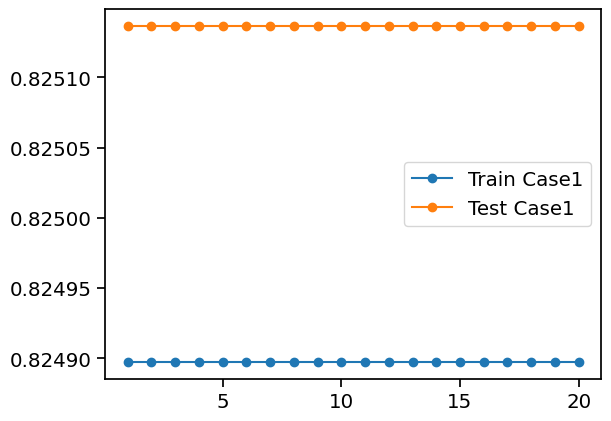

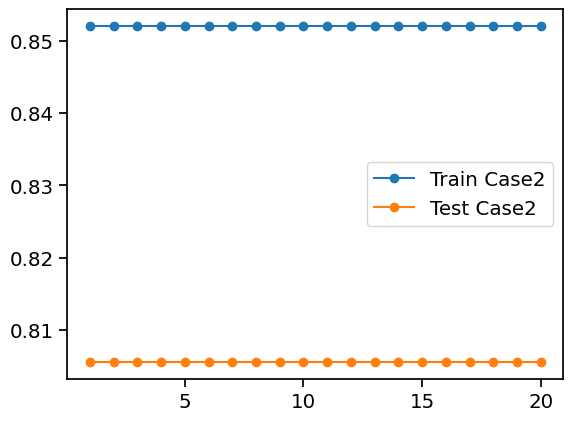

In [68]:
# Checing for overfitting or underfitting or just fit Model for MLE NaiveBayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    #Model and train creation for Case 1
    model = GaussianNB(var_smoothing =0.1)
    model.fit(x_train1,y_train1)

    #predict the results for training model
    nb_pred_random_train = model.predict(x_train1)

    #predict the results for test model
    nb_pred_random = model.predict(x_test1)

    #test the accuracy of the prediction
    lb_acc_score_case1 = accuracy_score(y_test1, nb_pred_random)
    lb_acc_score_case1_train = accuracy_score(y_train1, nb_pred_random_train)
    test_scores.append(lb_acc_score_case1)
    train_scores.append(lb_acc_score_case1_train)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train Case1')
pyplot.plot(values, test_scores, '-o', label='Test Case1')
pyplot.legend()
pyplot.show()


#Model and train creation for Case 2
train_scores1, test_scores1 = list(), list()
values = [i for i in range(1, 21)]

for i in values:
    model = GaussianNB(var_smoothing =0.1)
    model.fit(x_train2,y_train2)


    #predict the results for training model
    nb_pred_random_train = model.predict(x_train2)


    #predict the results for test model
    nb_pred_random = model.predict(x_test2)

    #test the accuracy of the prediction
    lb_acc_score_case2 = accuracy_score(y_test2, nb_pred_random)
    lb_acc_score_case2_train = accuracy_score(y_train2, nb_pred_random_train)
    test_scores1.append(lb_acc_score_case2)
    train_scores1.append(lb_acc_score_case2_train)
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores1, '-o', label='Train Case2')
pyplot.plot(values, test_scores1, '-o', label='Test Case2')
pyplot.legend()
pyplot.show()




<h3> In MLE Naive Bayes, for case 1 test is doing better performance then training and its just fit but for case 2, train is overfit
than test </h3>